# Visualising solutions to differential equations using Phase Space Diagrams

    Name: Beltran Sajonia-Coburgo-Gotha
    ID: 170449861
    Due date: Sunday 6 January 2019, 11:59 pm

### Introduction

The aim of this report is to build robust graphing functions that are suitable for a range of differential equations. It focuses on the applications of Phase Space Diagrams to visualize and analyse the behaviour of such solutions. For this reason, the reader is encouraged to use the functions developed in this project to solve their own physical probelms, specially using the functions ***Arrows*** and ***Lines*** which are robust functions for displaying vector field lines and direction lines respectively. These two functions become specially useful when a problem does not have analytic solutions, and visualising numerical solutions gives the reader a good understanding of the system behaviour.

A range of physial and mathematical problems were used to showcase how phase space diagrams can give us a good intuition for the behaviour of solutions, and in each one of them, the reader is enouraged to explore how further modifications can lead to more accurate and complex models.

In terms of the coding topics covered in this report, I wanted to explore some more sophisticated graphic libraries, specially ***Quiver*** from the *Matplotlib* libary as it is a excellet toolkit to start visualising vector fields. Due to the limited amount of time available for this project, there was no time to explore ***MayaVi*** (an even more sophisticated graphing library) or attempt to animate solutions, which the reader is highly encouraged to do. Nonetheless, there was just enough time to cover *contour* plots and and begin graphing *3D* plots (which can be extended to 3D vector fields). In terms of finding the solutions to the different problems, ***solve_ivp*** from scipy.integrate was the primary method of solution, although the reader will be shown how some mechanics problems can be written using Linear Algebra and matrices. The reader should also pay close attention to the comments left within the code itself, as it will explain subtleties that make the functions so robust.

## Lotka-Volterra Equations: Example of $1^{\text{st}}$ Order Non-Linear ODEs

The Lotka-Voletrra Equations are a set of *coupled* non-linear ODEs that descibe how predator-prey population numbers vary. They are:

$$ \frac{dx}{dt} = \alpha_{1} x - \gamma_{1}xy
\\
\frac{dy}{dt} = -\alpha_{2} y + \gamma_{2}xy
$$

Where: 
- $x$ represents prey population
- $y$ represents predator population
- $ \alpha_1 $: reproduction rate of prey
- $ \alpha_2 $: death rate of predator
- $ \gamma_1 $: death rate of prey due to predators
- $ \gamma_2 $: reproduction rate of predators 

##### Making sense of the equations

$\alpha_{1} x $ implies that in the absence of predators $(y=0)$, the prey population will grow exponentially without bounds.
Similarly, $-\alpha_2 y$ means that in the absence of prey, predator population decays exponentially.
The terms containing a $\gamma$ factor represent the interaction between both species, more precisely, $-\gamma_1 x y $ implies prey population will decrease in the presence of *both* species and similarly, $-\gamma_2 x y $ implies predator population will increase in the presence of *both* species.

##### Assumptions

The first assumption is that predator survival is entirely dependent on the presence of one other species, in this case the prey. Another assumption is that there is no bound on the growth of prey population if there are no predators. More subtle assumptions iclude assuming both prey and predator roam randomly and uniformly distributed, as well as assuming unlimited resources to sustain prey populations and that population numbers are real numbers and not integers.

We can now proceed to solve the equations.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import pylab as plt
%matplotlib inline

param = np.array((1,0.02,0.4,0.02))
α1 , γ1 , α2 , γ2 = param

def dX_dt(t, X): #X is the array: [prey,predator]
    return np.array([  α1*X[0] - γ1*X[0]*X[1] ,
                      -α2*X[1] + γ2*X[0]*X[1] ])

In [2]:
t = np.linspace(0,20,1000)
X0 = np.array([10,20])
X_f1 = np.array([α2/γ2,α1/γ1]) #represents the centre (equilibrium point)

minimum Rabbits: 2.986784108006628
minimum Foxes: 17.189638702251006


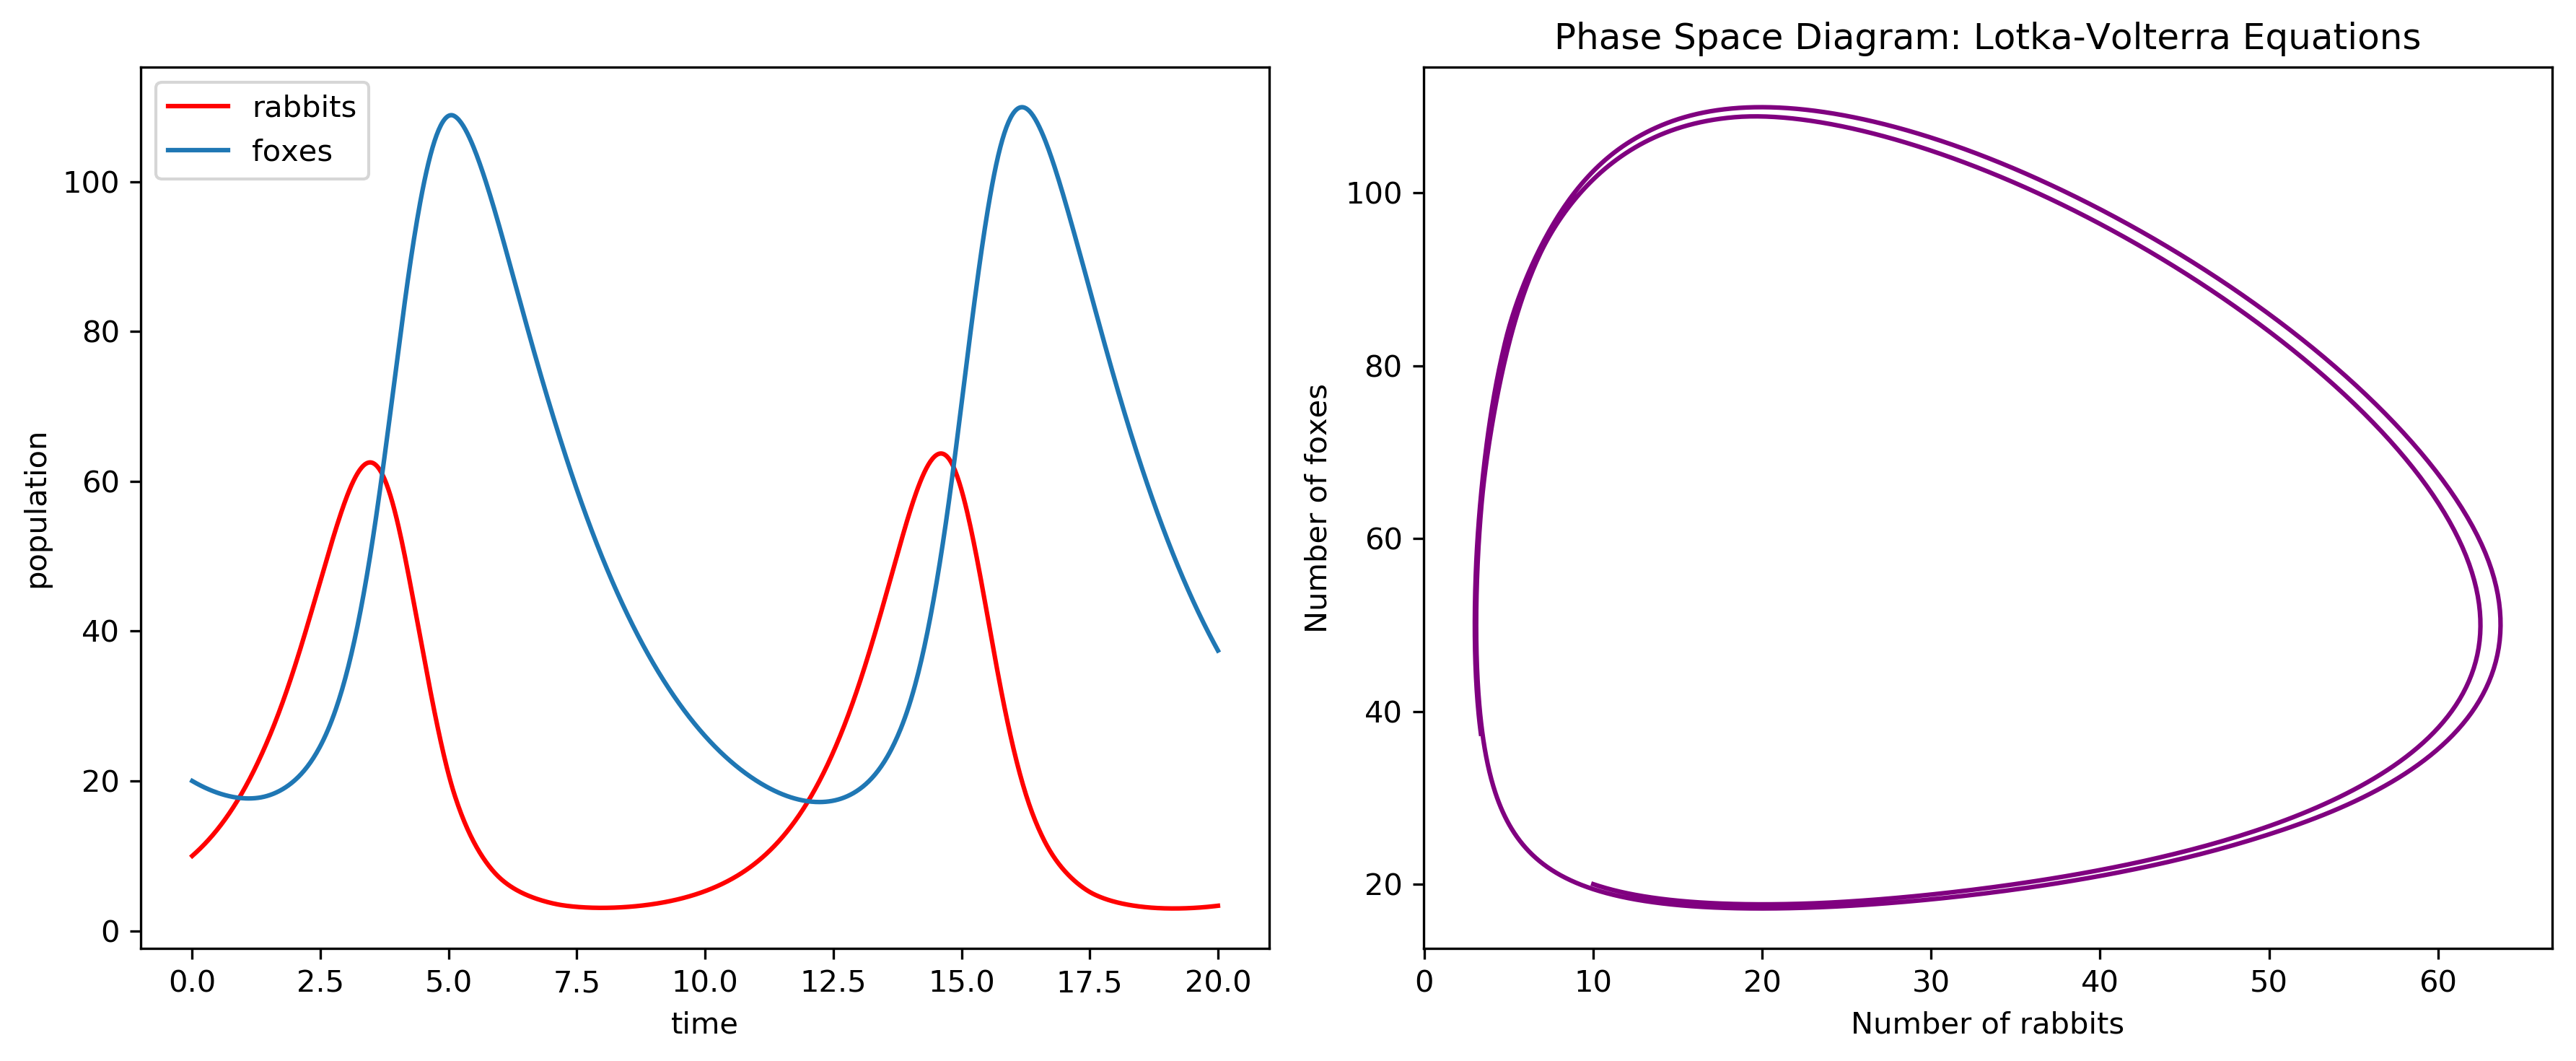

In [3]:
solution = solve_ivp(dX_dt,[np.argmin(t),np.argmax(t)],X0,t_eval=t)
rabbits, foxes = solution.y #solution.y returns the population values packed
print("minimum Rabbits:",rabbits[np.argmin(rabbits)])
print("minimum Foxes:",foxes[np.argmin(foxes)])
plt.figure(figsize=(12,5),dpi=300)
plt.subplot(1,2,1)
plt.plot(solution.t, rabbits,label = "rabbits",color="red")
plt.plot(solution.t, foxes,label = "foxes")
plt.legend()
plt.xlabel('time')
plt.ylabel('population')
plt.axis('auto')
plt.subplot(1,2,2)
plt.plot(rabbits,foxes,color="purple")
plt.xlabel("Number of rabbits")
plt.ylabel("Number of foxes")
plt.title("Phase Space Diagram: Lotka-Volterra Equations")
plt.tight_layout()
plt.show()


Above, is our first example of the phase space diagram. It is worth noting that cyclic behaviour is represented by closed curves on the phase space diagram. However, the next step is to construct the full phase space diagram for this system, that is, plot the population of rabbits against the population of foxes for different initial conditions. Although extensive study has been done on the analysis of phase space diagrams and the stabilty of steady states, the following information is provided to the reader for a better understanding of the phase space diagram.

##### Steady states and Stability

- **Nullclines** are identified by equating each differential equation to zero and solving for x and y. **Stead states** are the the points at which the nullclines intersect. The **Jacobian** allows us to calculate the **eigenvalues** and **eigenvectors** for each steady state. 
- Solutions are stable (approach a steady state) along their corresponding eigenvector if the eigenvalue is negative. The opposite is true for unstable solutions.
- Solutions near $\big( \frac{\alpha_2}{\gamma_2} , \frac{\alpha_1}{\gamma_1} \big)$ are centres because the corresponding eigenvalues are purely imaginary.

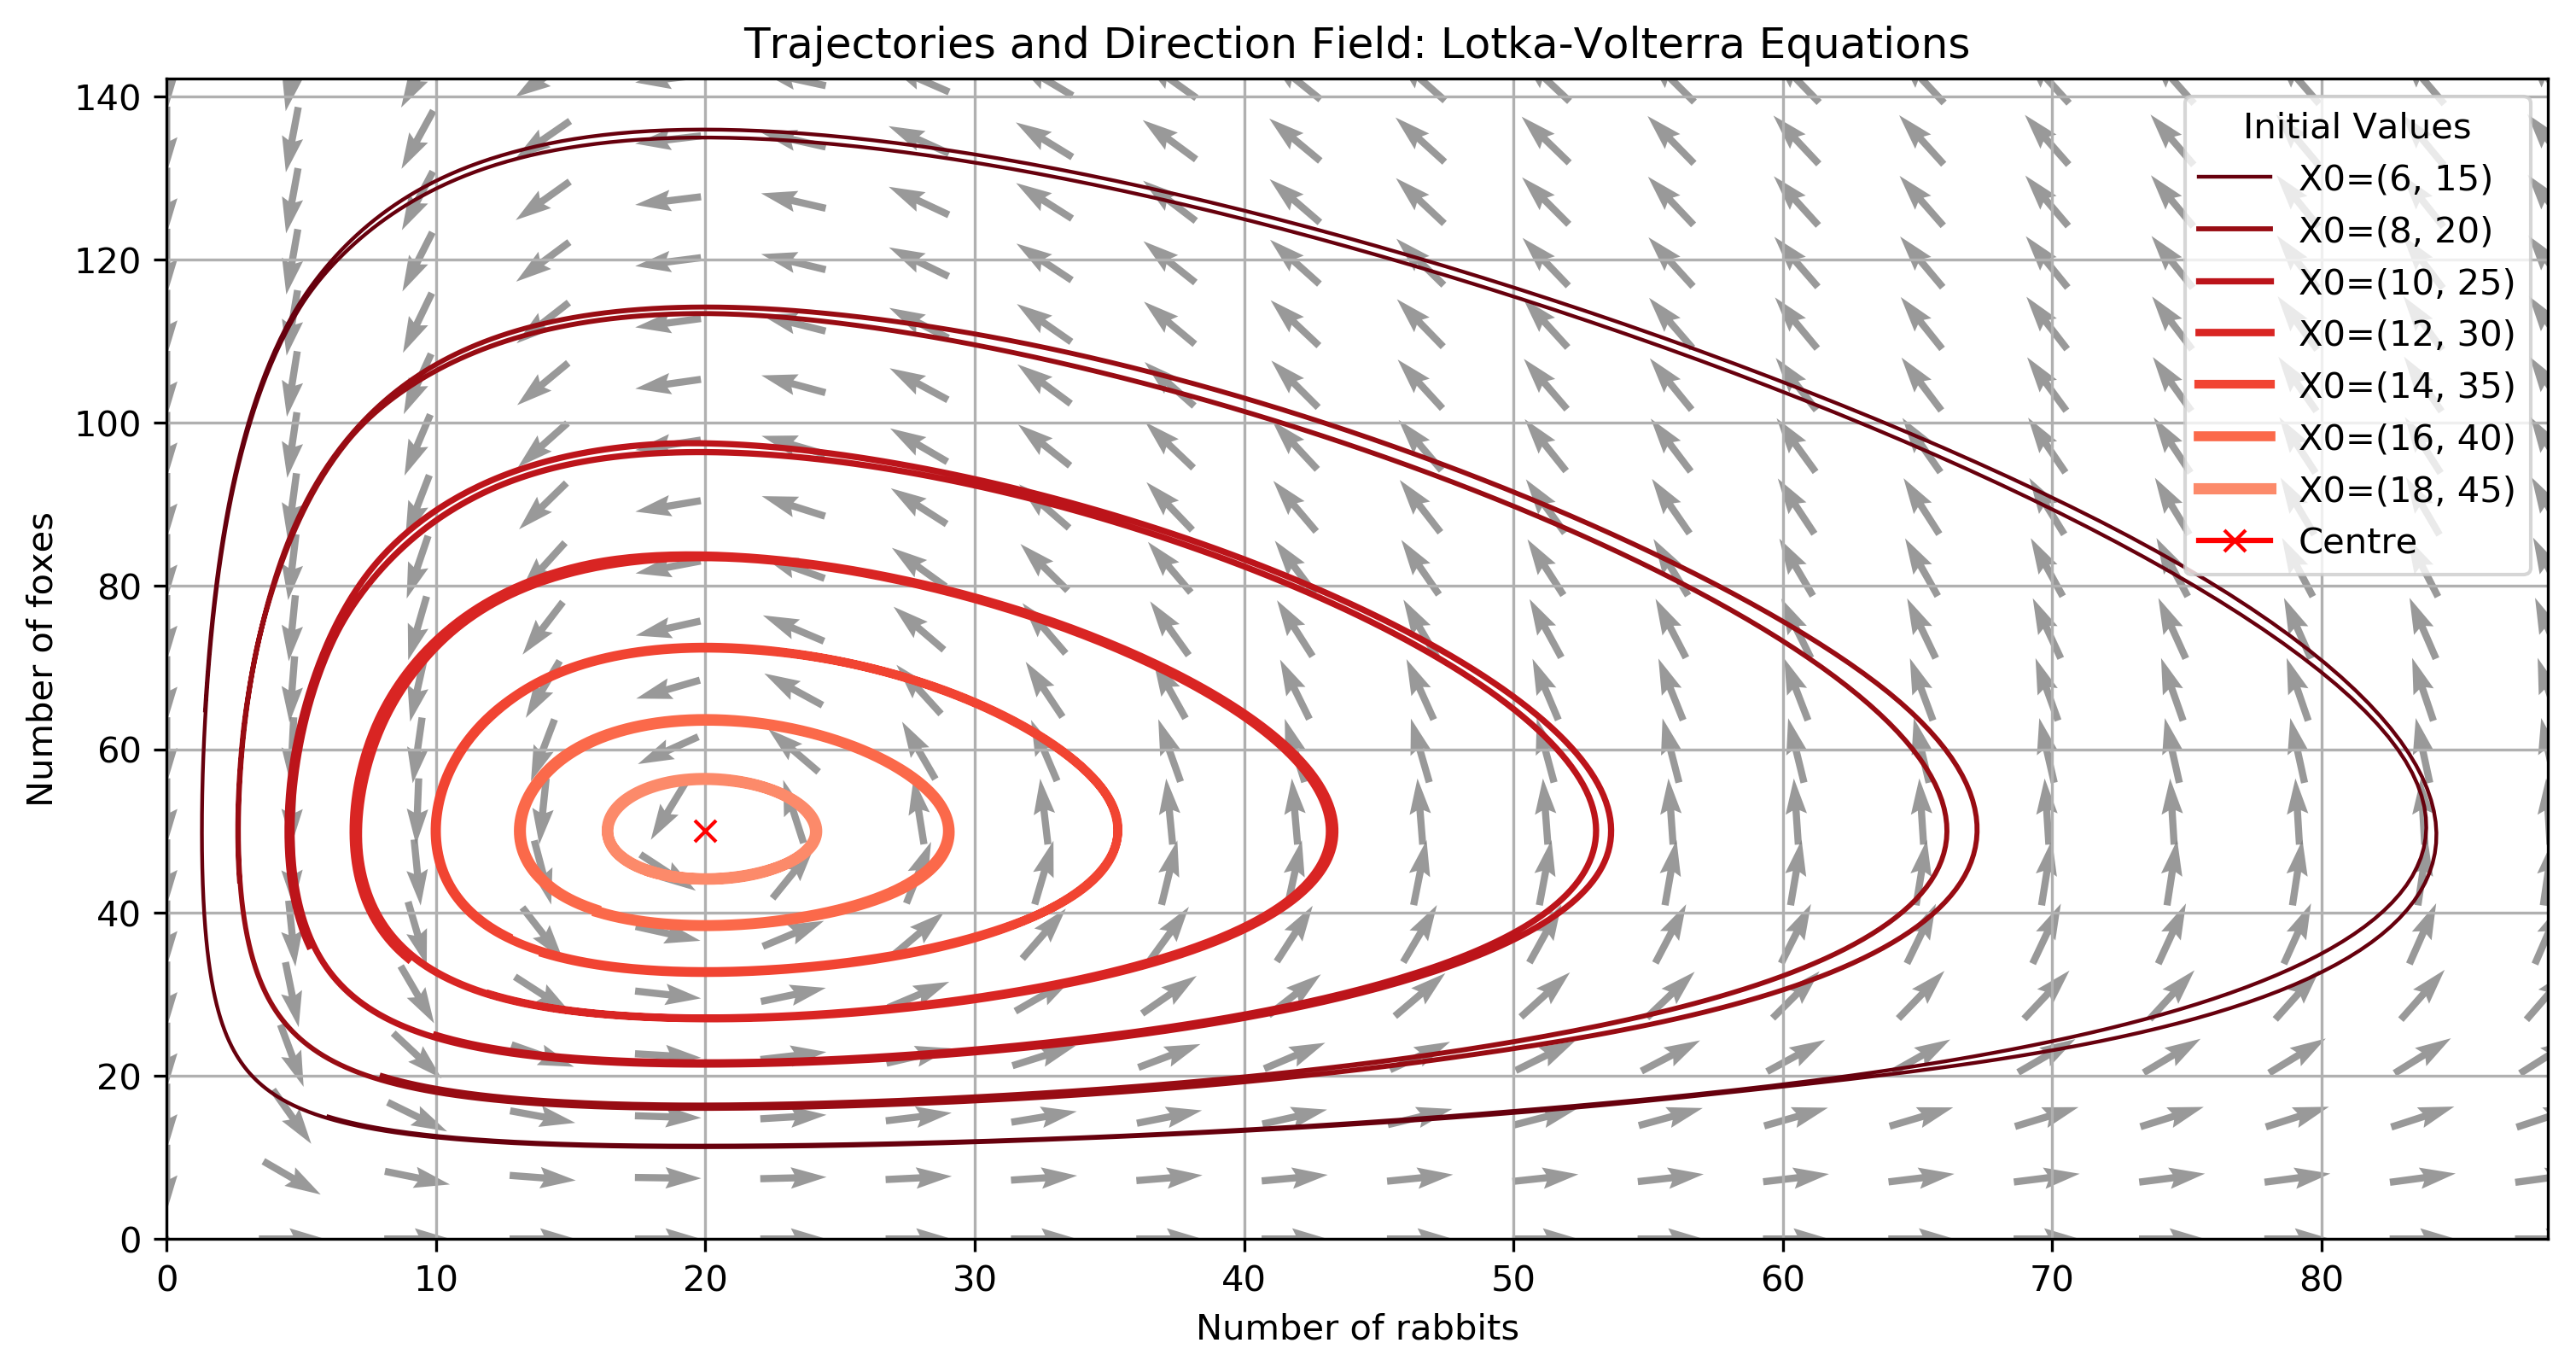

In [4]:
plt.figure(figsize=(12,6),dpi=300)
values = np.linspace(0.3,0.9,7) #This means 7 lines deviating from the equilibrium point
colors = plt.cm.Reds_r(np.linspace(0,0.6,len(values))) 
#splits the continiuous color spectrum into descrete RGB values, in this case 7 RGB values.
for v, col in zip(values, colors): 
    #zip is like for elem in something but doing two at the same time starting point
    X0 = v * X_f1                               
    X = solve_ivp(dX_dt,[np.argmin(t),np.argmax(t)],X0,t_eval=t)    
    plt.plot( X.y[0], X.y[1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )
#save for later: checks the maximum values reached in the phase space diagram
ymax = plt.ylim(ymin=0)[1]
xmax = plt.xlim(xmin=0)[1]

## plotting the direction fields
grid = 20
x = np.linspace(0 , xmax, grid)
y = np.linspace(0 , ymax, grid)

X1, Y1 = np.meshgrid(x,y) #X1 and Y1 are both matrices of the axis dimensions
#they create the grid for where the vector arrows must be placed
DX1 , DY1 = dX_dt(t,[X1 , Y1])
M = plt.hypot(DX1,DY1) #hypot computes the magnitude of the hypthenuse of the triangle formed by the two sides
#in this case it returns the magnitude of the arrow
M [M==0] = 1 #avoids zero division
#Normalize each vector arrow
DX1 /= M
DY1 /= M
colormap = plt.cm.binary_r
plt.title("Trajectories and Direction Field: Lotka-Volterra Equations")
plt.xlabel("Number of rabbits")
plt.ylabel("Number of foxes")
plt.quiver(X1, Y1, DX1 ,DY1,pivot = 'mid',color='grey',alpha=0.8)
plt.xlim(0,xmax)
plt.ylim(0,ymax)
plt.grid()
plt.plot(X_f1[0],X_f1[1],marker='x',color="red",label="Centre")
plt.legend(title="Initial Values")
plt.show()

The reason for starting with the Lotka-Volterra equations is that one can obtain an explicit solution for the equilibrium lines. This is because the analytic solution (shown below) represents a surface, and the trajectories on the diagram above are slices of this surface which can be plotted using contour plots (ISO lines).

Derive the equation for $\frac{dy}{dx}$, solve implicitly for $x$ and $y$ using separation of variables an integrating.

$$ 
\begin{align}
\frac{dy}{dx} &= \frac{y(-\alpha_2 + \gamma_2 x )}{x (\alpha_1 - \gamma_1 y)}
\\
\frac{(\alpha_1 - \gamma_1 y)}{y}dy &= \frac{(-\alpha_2 + \gamma_2 x )}{x}dx 
\\
\int \frac{\alpha_1}{y} dy - \int \gamma_1 dy &= -\alpha_2 \int \frac{1}{x}dx + \int \gamma_2 dx
\\
\alpha_1 \ln(y) - \gamma_1 y &= -\alpha_2 \ln(x) + \gamma_2 x + C
\\
\ln(y^{\alpha_1}) + \ln (x^{\alpha_2}) &= \gamma_2 x + \gamma_1 y + C
\\
\ln(x^{\alpha_2}y^{\alpha_1}) &= \gamma_2 x + \gamma_1 y + C
\\
F(x,y) &= \ln(x^{\alpha_2}y^{\alpha_1}) -\gamma_2 x - \gamma_1 y 
\end{align}
$$

###### ISO Lines

/Users/beltran/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


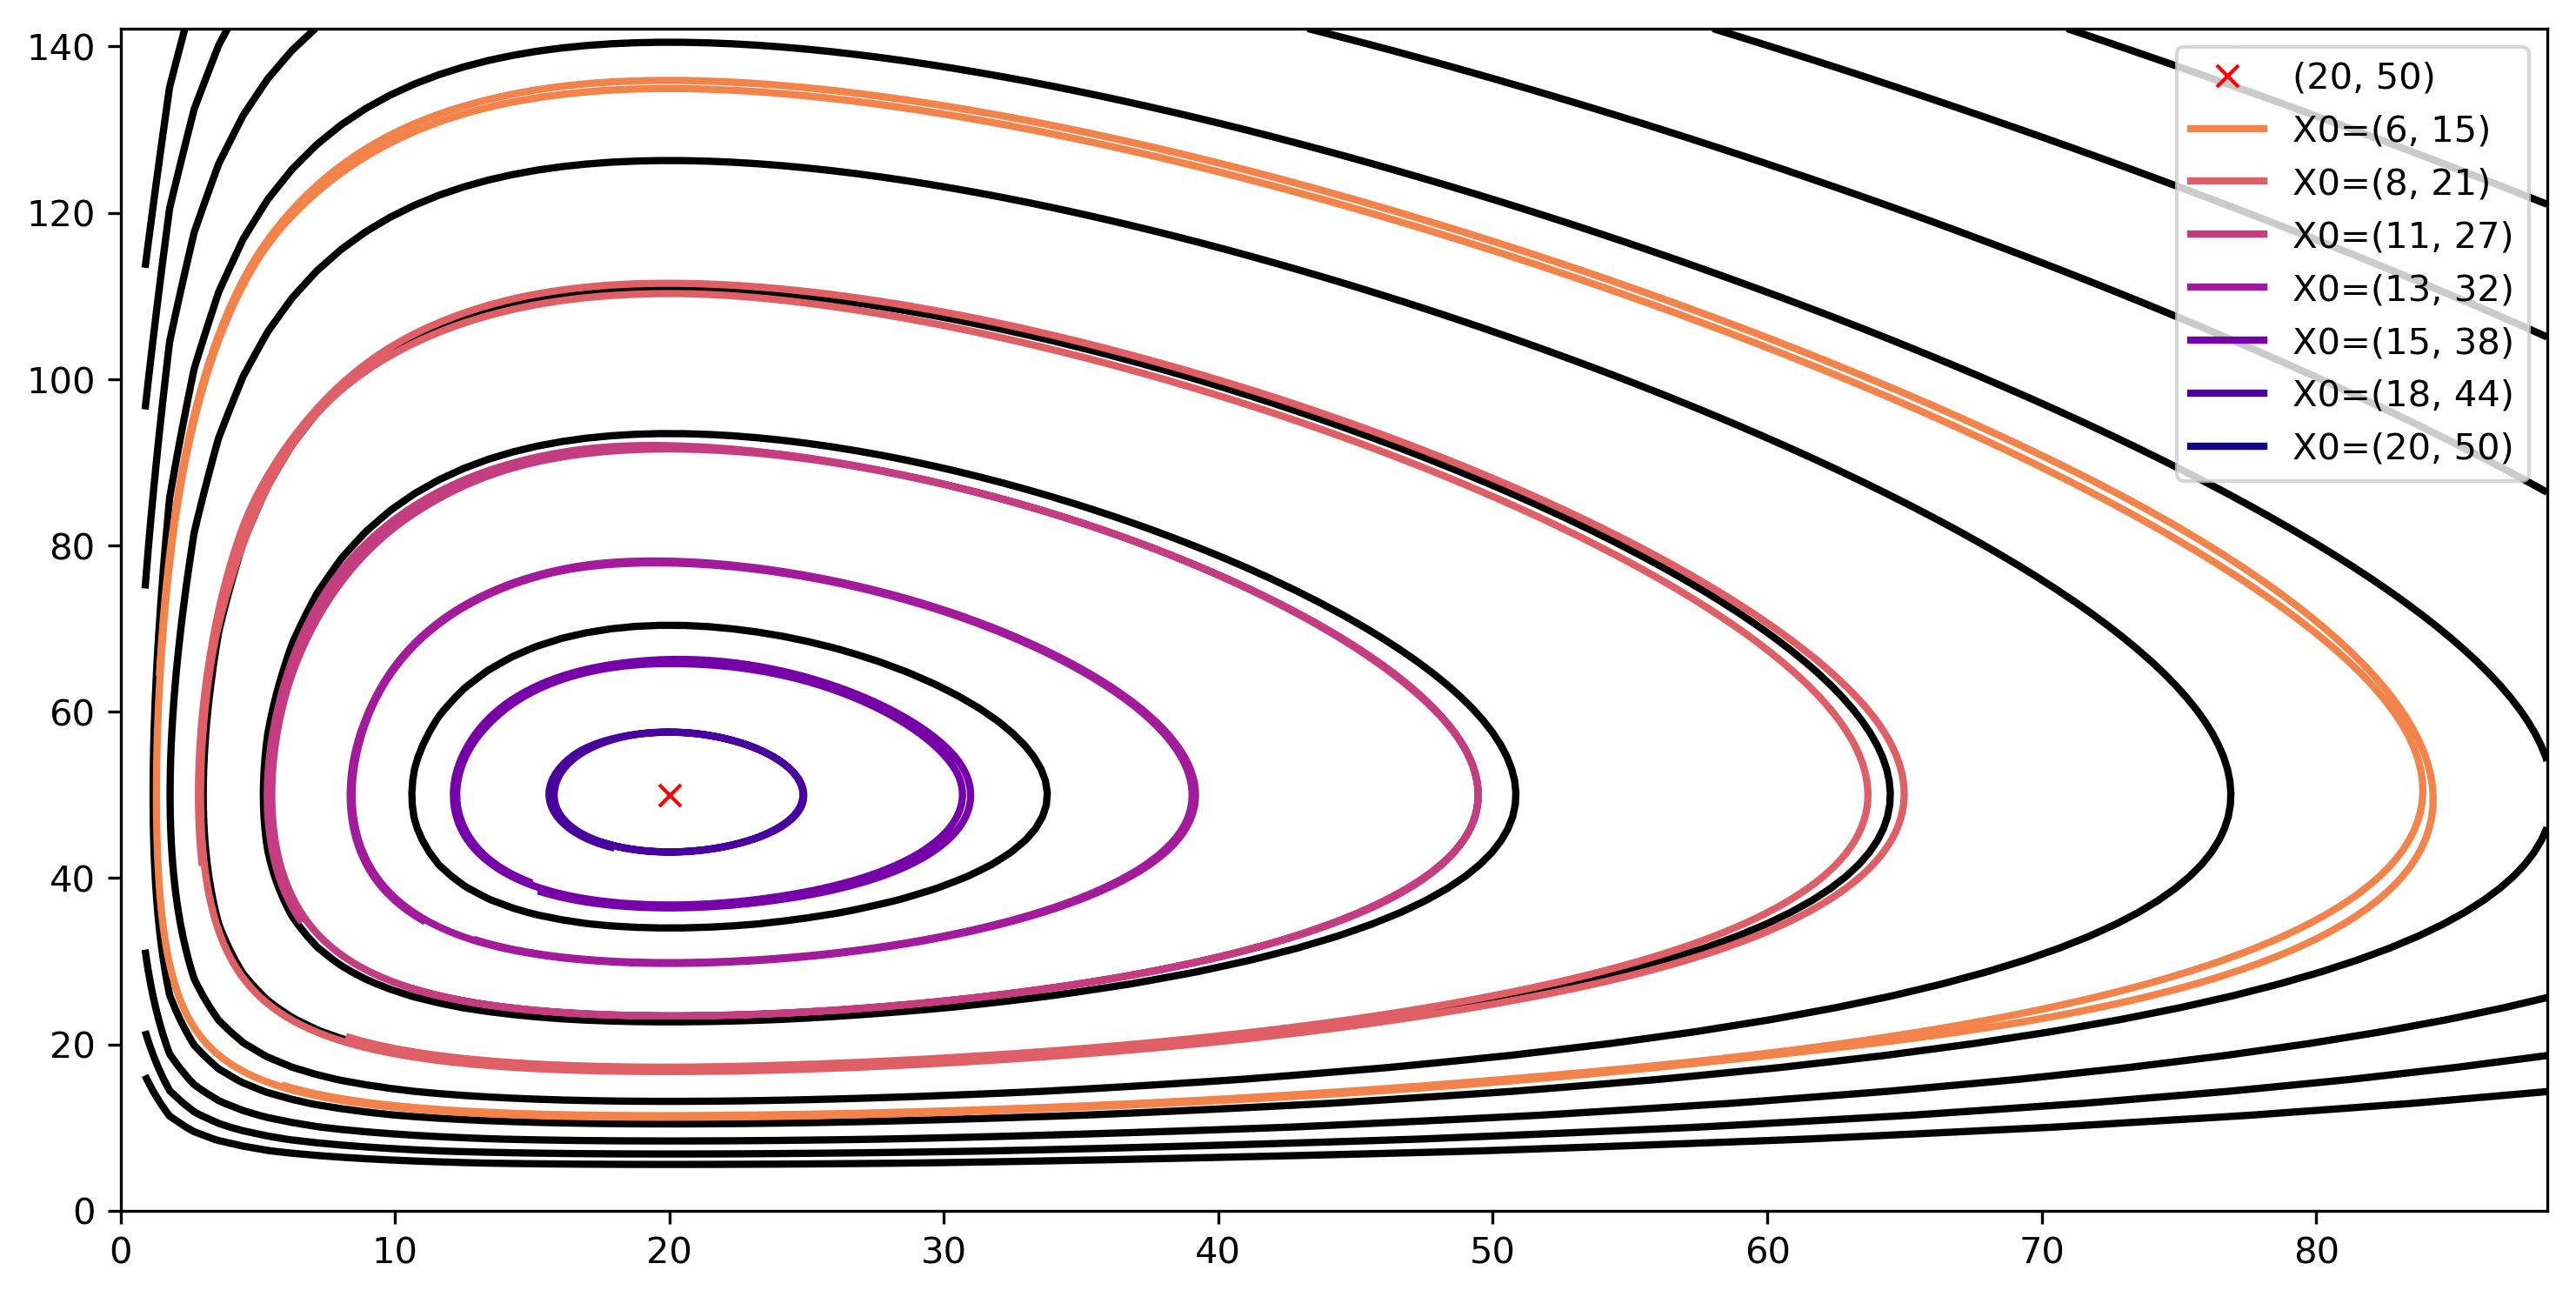

In [5]:
def F(X):
    x , y = X
    return np.log(x**α2 * y**α1) - γ2*x - γ1*y

plt.figure(figsize=(12,6),dpi=300)
eval_points = 100
x = np.linspace(0,xmax,eval_points)
y = np.linspace(0,ymax,eval_points)
X2 , Y2 = np.meshgrid(x,y)
colors = plt.cm.plasma_r(np.linspace(0.3,1,len(values))) 
Z4 = F([X2,Y2])
scale = np.linspace(2.4,4,10)
CS2 = plt.contour(X2,Y2,Z4,colors='black',levels=scale,linewidths = 2)
plt.plot(*X_f1,'x',color='red',label='(%.f, %.f)' % ( X_f1[0], X_f1[1]))

values = np.linspace(0.3,1,7)
for v, col in zip(values, colors): 
    X0 = v * X_f1                               
    X = solve_ivp(dX_dt,[np.argmin(t),np.argmax(t)],X0,t_eval=t)    
    plt.plot( X.y[0], X.y[1], linewidth=2, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )
plt.legend()
plt.show()

Here we can see how the numerical solutions are a very good approximation to the analytical solution marked by the black ISO lines. However, most physical problems do not have an analytical solution and numerical approximations are necessary. Given that *solve_ivp* is a good differential equation solver, we proceed with the next physical example.

## Harmonic oscillator

A favourite amongst physicists is the Harmonic Oscialltor. Described by the following second order ODE, but this time **NOT** assuming that $sin(\theta) \approx \theta$, and using the substitution below, it can be solved as a first order ODE. The reader is expected to be familiar with the solution where $sin(\theta) \approx \theta$.

$$
\frac{d^2 \theta}{d t^2} + \omega_0^2 \sin (\theta) = 0
\\
\\
$$
$$
x = \theta
\\
y = \frac{d \theta}{dt}
$$

\begin{equation}
\frac{d}{dt}
\begin{bmatrix}
    x \\
    y \\   
\end{bmatrix}= 
\begin{bmatrix}
    y \\
    - \omega_0^2 \sin (x)
\end{bmatrix}
\end{equation}


In [6]:
ω0 = 1
def dharmonic(t, T):
    return np.array([ T[1] ,- ω0**2 * np.sin(T[0]) ])

In [7]:
X0 = np.array([3,0])
t = np.linspace(0,20,1000)
m = 2
X_f1 = np.array([m*np.pi,0])
solution = solve_ivp(dharmonic,[np.argmin(t),np.argmax(t)],X0,t_eval=t)
position , velocity = solution.y

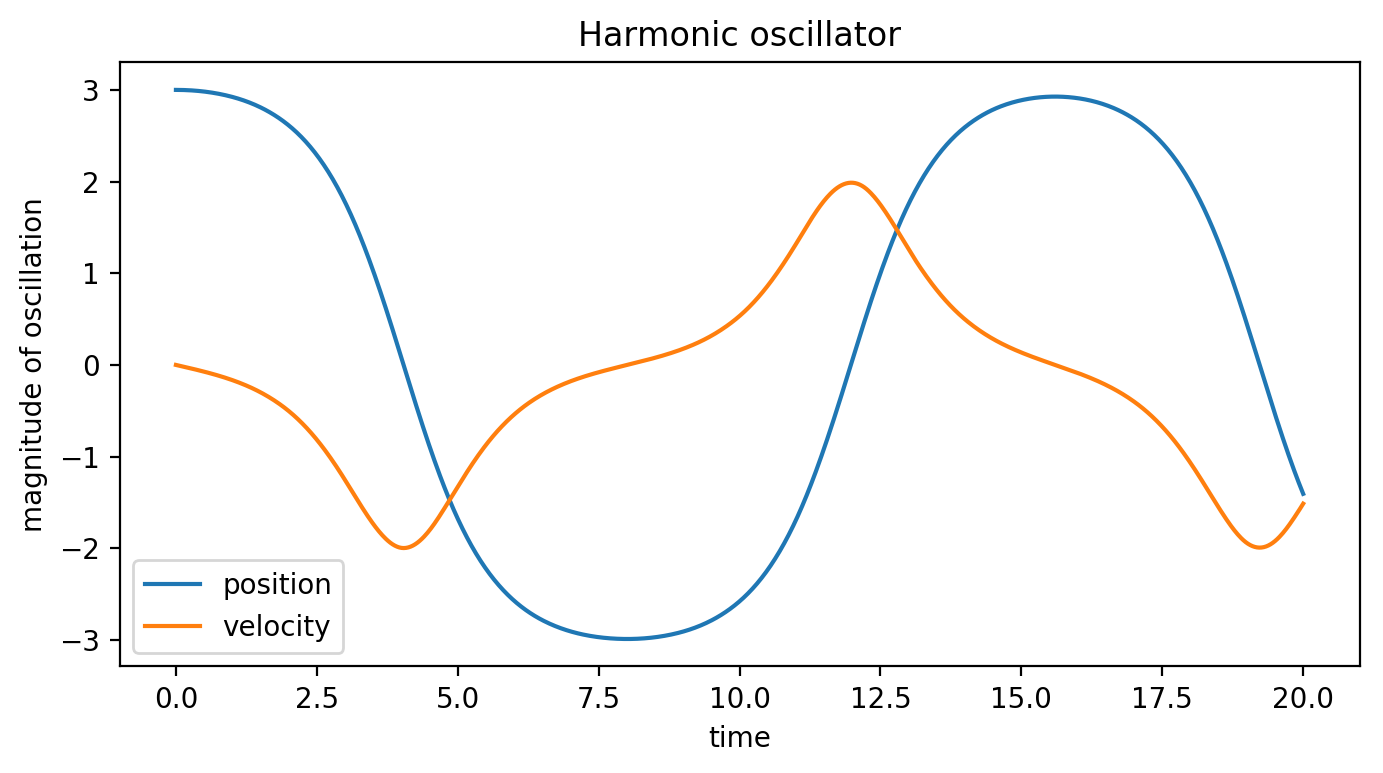

In [8]:
plt.figure(dpi=200,figsize=(8,4))
plt.plot(t,position, label = "position")
plt.plot(t,velocity, label = "velocity")
plt.xlabel("time")
plt.ylabel("magnitude of oscillation")
plt.title("Harmonic oscillator")
plt.legend()
plt.show()

We can see how the above graph for the actual Harmonic Oscillator does not have the usual sinosodial solutions, but a power series solution of different trigonometric functions, which is a tedious and long process to do analytically. The conventional harmonic oscillator is characterized by a circle in its phase space diagram, and we shall see how the small angle approximation does indeed work for small angles in the following phase diagram.

In [9]:
def HO_Vector_Field(grid,val,func,X0,G):
    plt.figure(figsize=(2*val,val),dpi=300)
    x = np.linspace(-2*val , 2*val, grid)
    y = np.linspace(-val , val, grid)
    X1, Y1 = np.meshgrid(x,y)
    DX1 , DY1 = func(t,[X1 , Y1])
    M = plt.hypot(DX1,DY1)
    M [M==0] = 1
    DX1 /= M
    DY1 /= M
    colormap = plt.cm.binary_r
    plt.title("Trajectories and Direction Field")
    plt.xlabel("Postition")
    plt.ylabel("Velocity")
    plt.quiver(X1, Y1, DX1 ,DY1,pivot = 'mid',color='black',alpha=0.2)
    plt.axis("equal")
    plt.xlim(-2*val,2*val)
    plt.ylim(-val,val)
    p = 0
    for i in range(G):
        X0 = np.array([X0[0],X0[1]+p])
        solution = solve_ivp(func,[np.argmin(t),np.argmax(t)],X0,t_eval=t)
        position , velocity = solution.y
        plt.plot(position,velocity,color="blue")
        plt.axis("equal")
        plt.xlim(-2*val,2*val)
        plt.ylim(-val,val)
        p += 0.1

def HO_CriticalVal(p,val,func,X0):  
    X0 = np.array([0,p])
    solution = solve_ivp(func,[np.argmin(t),np.argmax(t)],X0,t_eval=t)
    position , velocity = solution.y
    plt.plot(position,velocity,color="red")
    plt.axis("equal")
    plt.xlim(-2*val,2*val)
    plt.ylim(-val,val)   

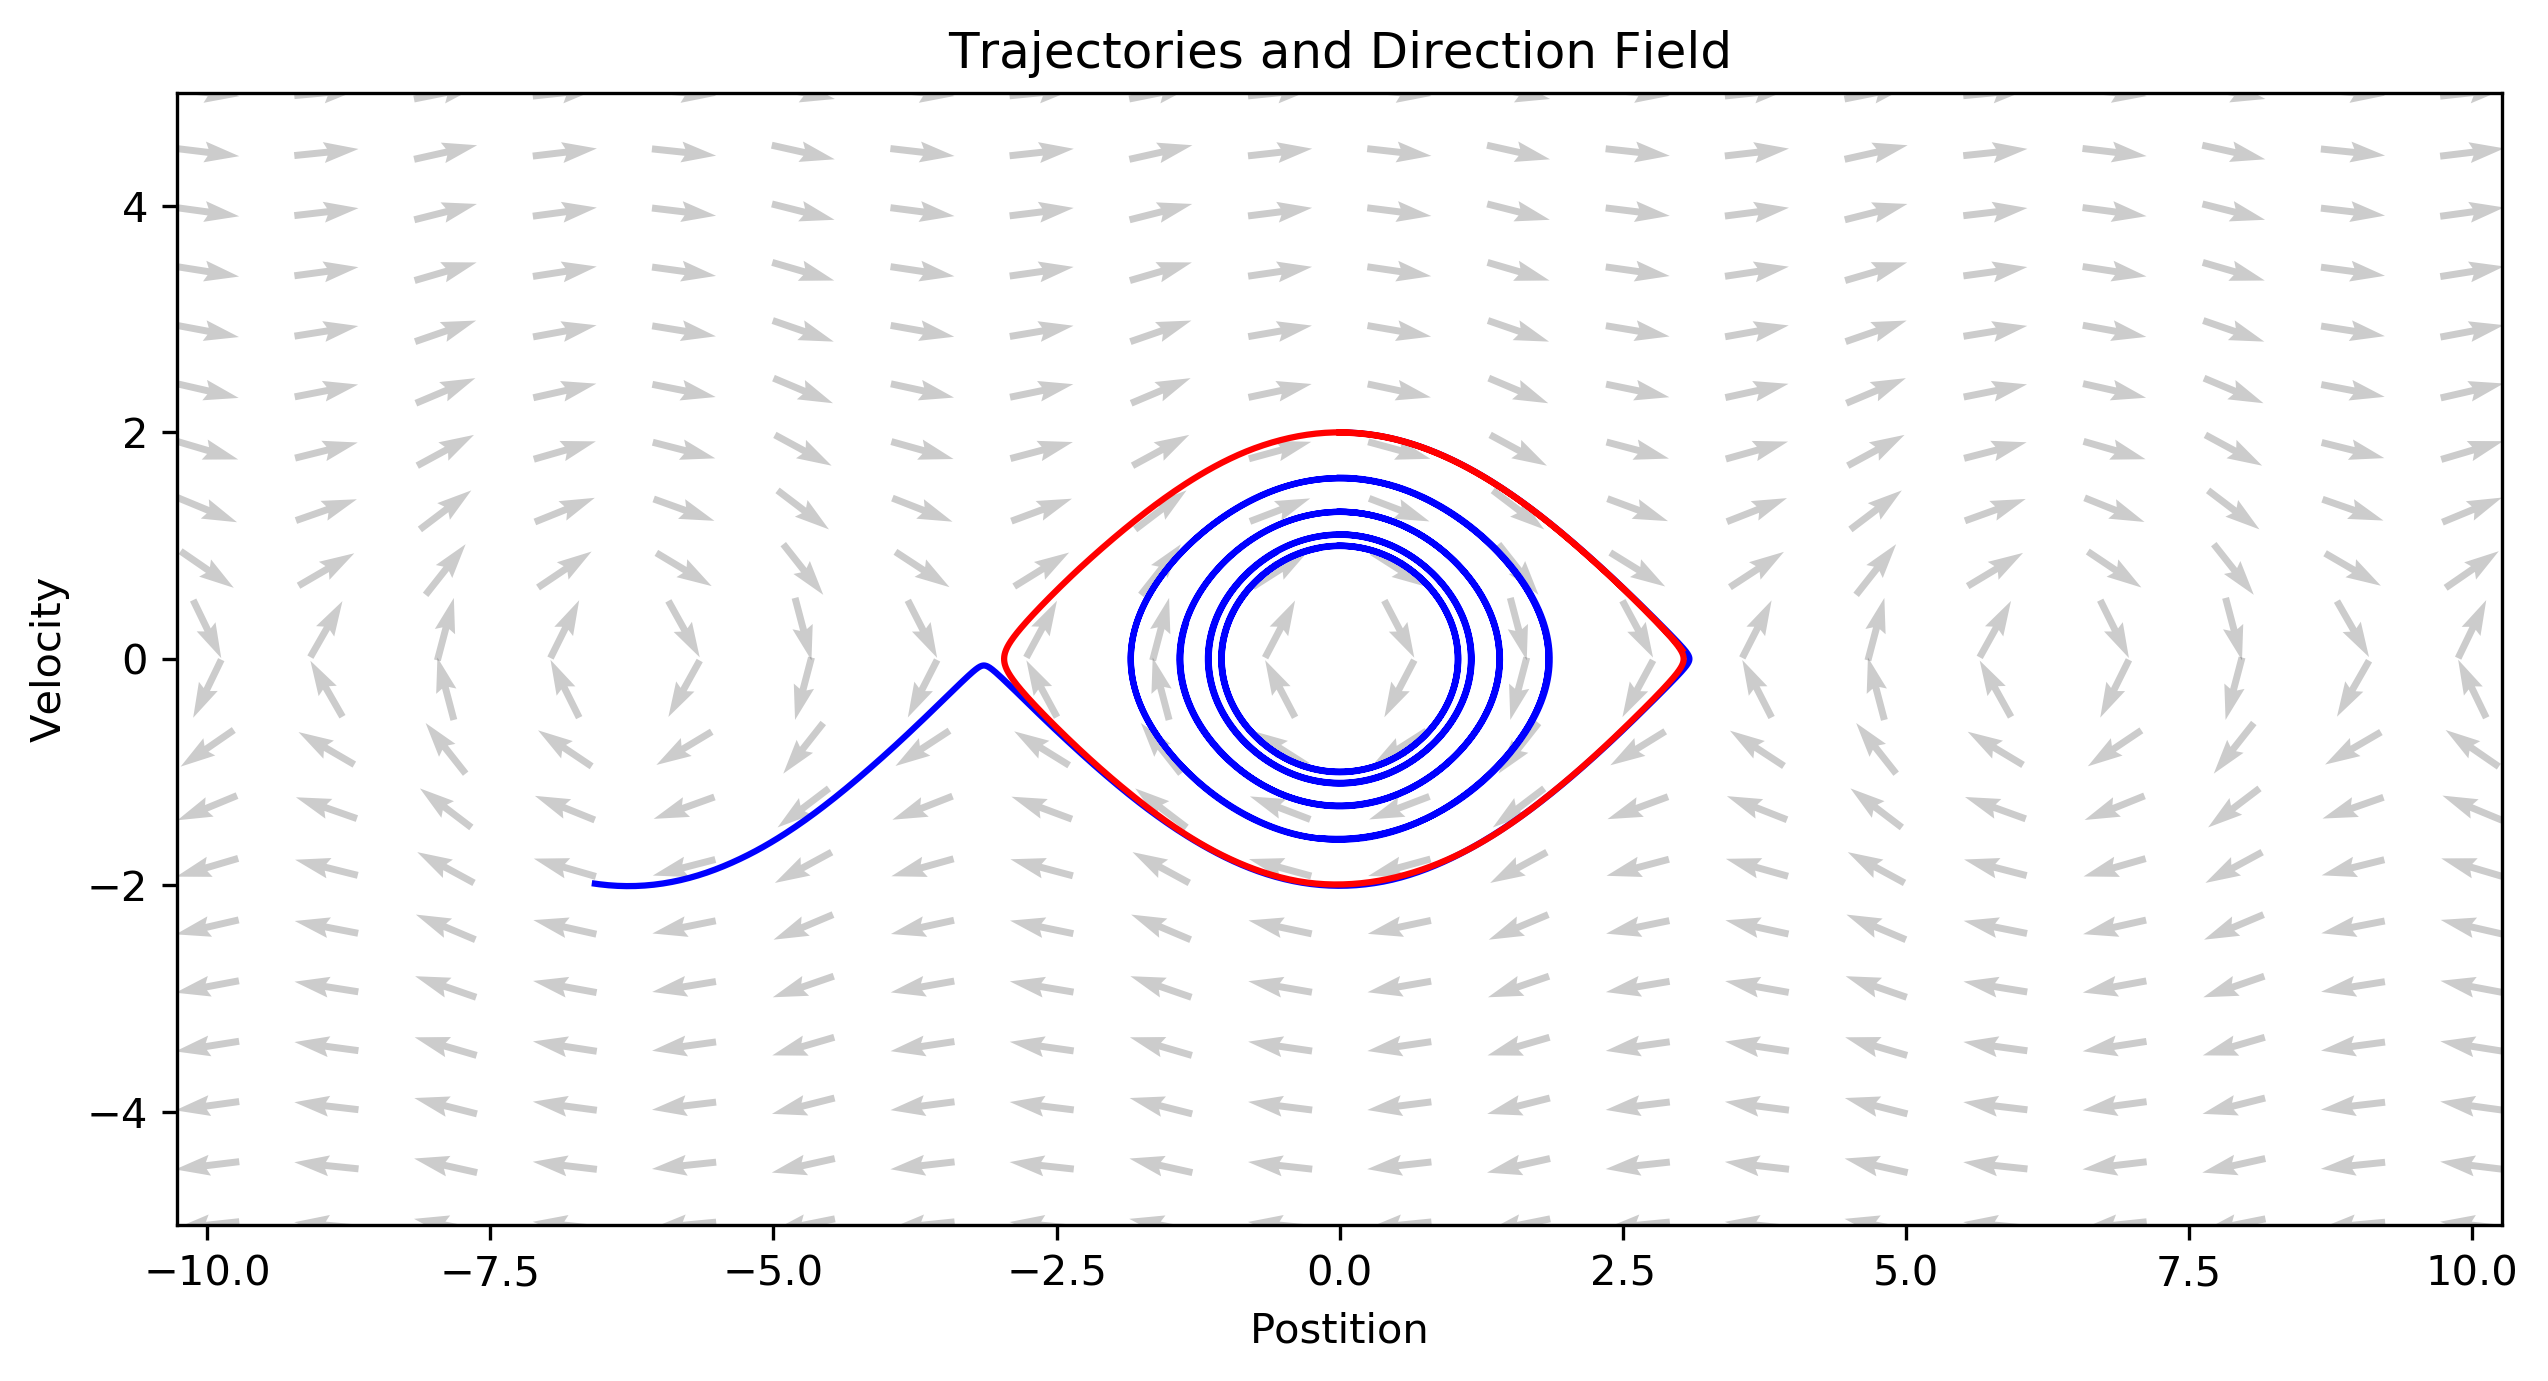

In [10]:
val = 5   
p = 2*ω0-0.002
X0 = np.array([0,1])
HO_Vector_Field(20,val,dharmonic,X0,5)
HO_CriticalVal(p,val,dharmonic,X0)

The phase diagram above shows how for small displacements, the approximation does indeed give the circular shape characteristic of the simple harmonic oscillator, but as the initial position increases, we can notice how the circular shape starts to oblate until reaching the critical value denoted by the red line.

## Damped  Harmonic Oscillator

We shall now begin generalizing our problem to the Damped Harmonic Oscillator and the treatment of its phase diagram. From an intuitive perspective the reader should be able to deduce the phase space diagram for an underdamped harmonic oscillator, that oscillates and exponentially decays. Because the velocity and displacement decrease as time increases, in the phase diagram it should approach the origin giving a spiral shape. The general form of the Damped Harmonic Oscillator is given by the following equation, that can be written using the following subtitution into the matrix equation:

$$ \frac{d^2 y}{dt^2} + \frac{\mu}{m}\frac{dy}{dt} + \frac{k}{m}y = 0
\\
\begin{align}
z_1 &= y
\\
z_2 &= \frac{dy}{dt}
\end{align}
$$


\begin{equation}
\frac{d}{dt}
\begin{bmatrix}
    z_1 \\
    z_2 \\   
\end{bmatrix}= 
\begin{bmatrix}
    0 & 1 \\
    - \frac{k}{m} & - \frac{ \mu }{m} \\
\end{bmatrix}
\begin{bmatrix}
    z_1 \\
    z_2 \\   
\end{bmatrix}
\end{equation}

The three cases for damping are given by:
 - Underdamped: $0<\mu^2<4km$
 - Critically Damped: $\mu^2 = 4km$
 - Overdamped: $\mu^2 > 4km$

The following code has been written as a fully generalised code for the damped harmonic oscillator, so that the reader can use it to visualize phase diagrams and the equations of motion for any case of the damped harmonic oscillator.

In [11]:
def Harmonic_Differential(t,X):
    M_H = np.array([[0,1],[-k/m , -μ/m]])
    vec = np.array([X[0],X[1]])
    return M_H@vec

In [12]:
def Calculate(param):
    #Returns which Damping case the problems deals with
    if μ**2 < 4*k*m:
        return("Underdamped")
    elif μ**2 == 4*k*m:
        return("Critically Damped")
    elif μ**2 > 4*k*m:
        return("Overdamped")

In [13]:
def Lines(func,X0,G,color='blue',legend=None,linewidth=1):
#This function uses the argument G for how many lines to plot, at different initial values 
    x = np.linspace(-2*val , 2*val, grid)
    y = np.linspace(-val , val, grid)
    plt.xlabel("postition")
    plt.ylabel("velocity")
    p = 0
    t = np.linspace(0,100,3000)
    if legend == None:
    #the conditional statements is so that there are no repeated entries in the legend
        for i in range(G):
            X0 = np.array([X0[0],X0[1]+p])
            solution = solve_ivp(func,[np.argmin(t),np.argmax(t)],X0,t_eval=t)
            position , velocity = solution.y
            plt.plot(position,velocity,color=color,linewidth=linewidth)
            #print(p)
            p += 0.1
    if legend != None:
        for i in range(G):
            if i ==0:
                X0 = np.array([X0[0],X0[1]+p])
                solution = solve_ivp(func,[np.argmin(t),np.argmax(t)],X0,t_eval=t)
                position , velocity = solution.y
                plt.plot(position,velocity,color=color,label="{:8.3f}".format(legend),linewidth=linewidth)
                p += 0.1
            else:
                X0 = np.array([X0[0],X0[1]+p])
                solution = solve_ivp(func,[np.argmin(t),np.argmax(t)],X0,t_eval=t)
                position , velocity = solution.y
                p += 0.1

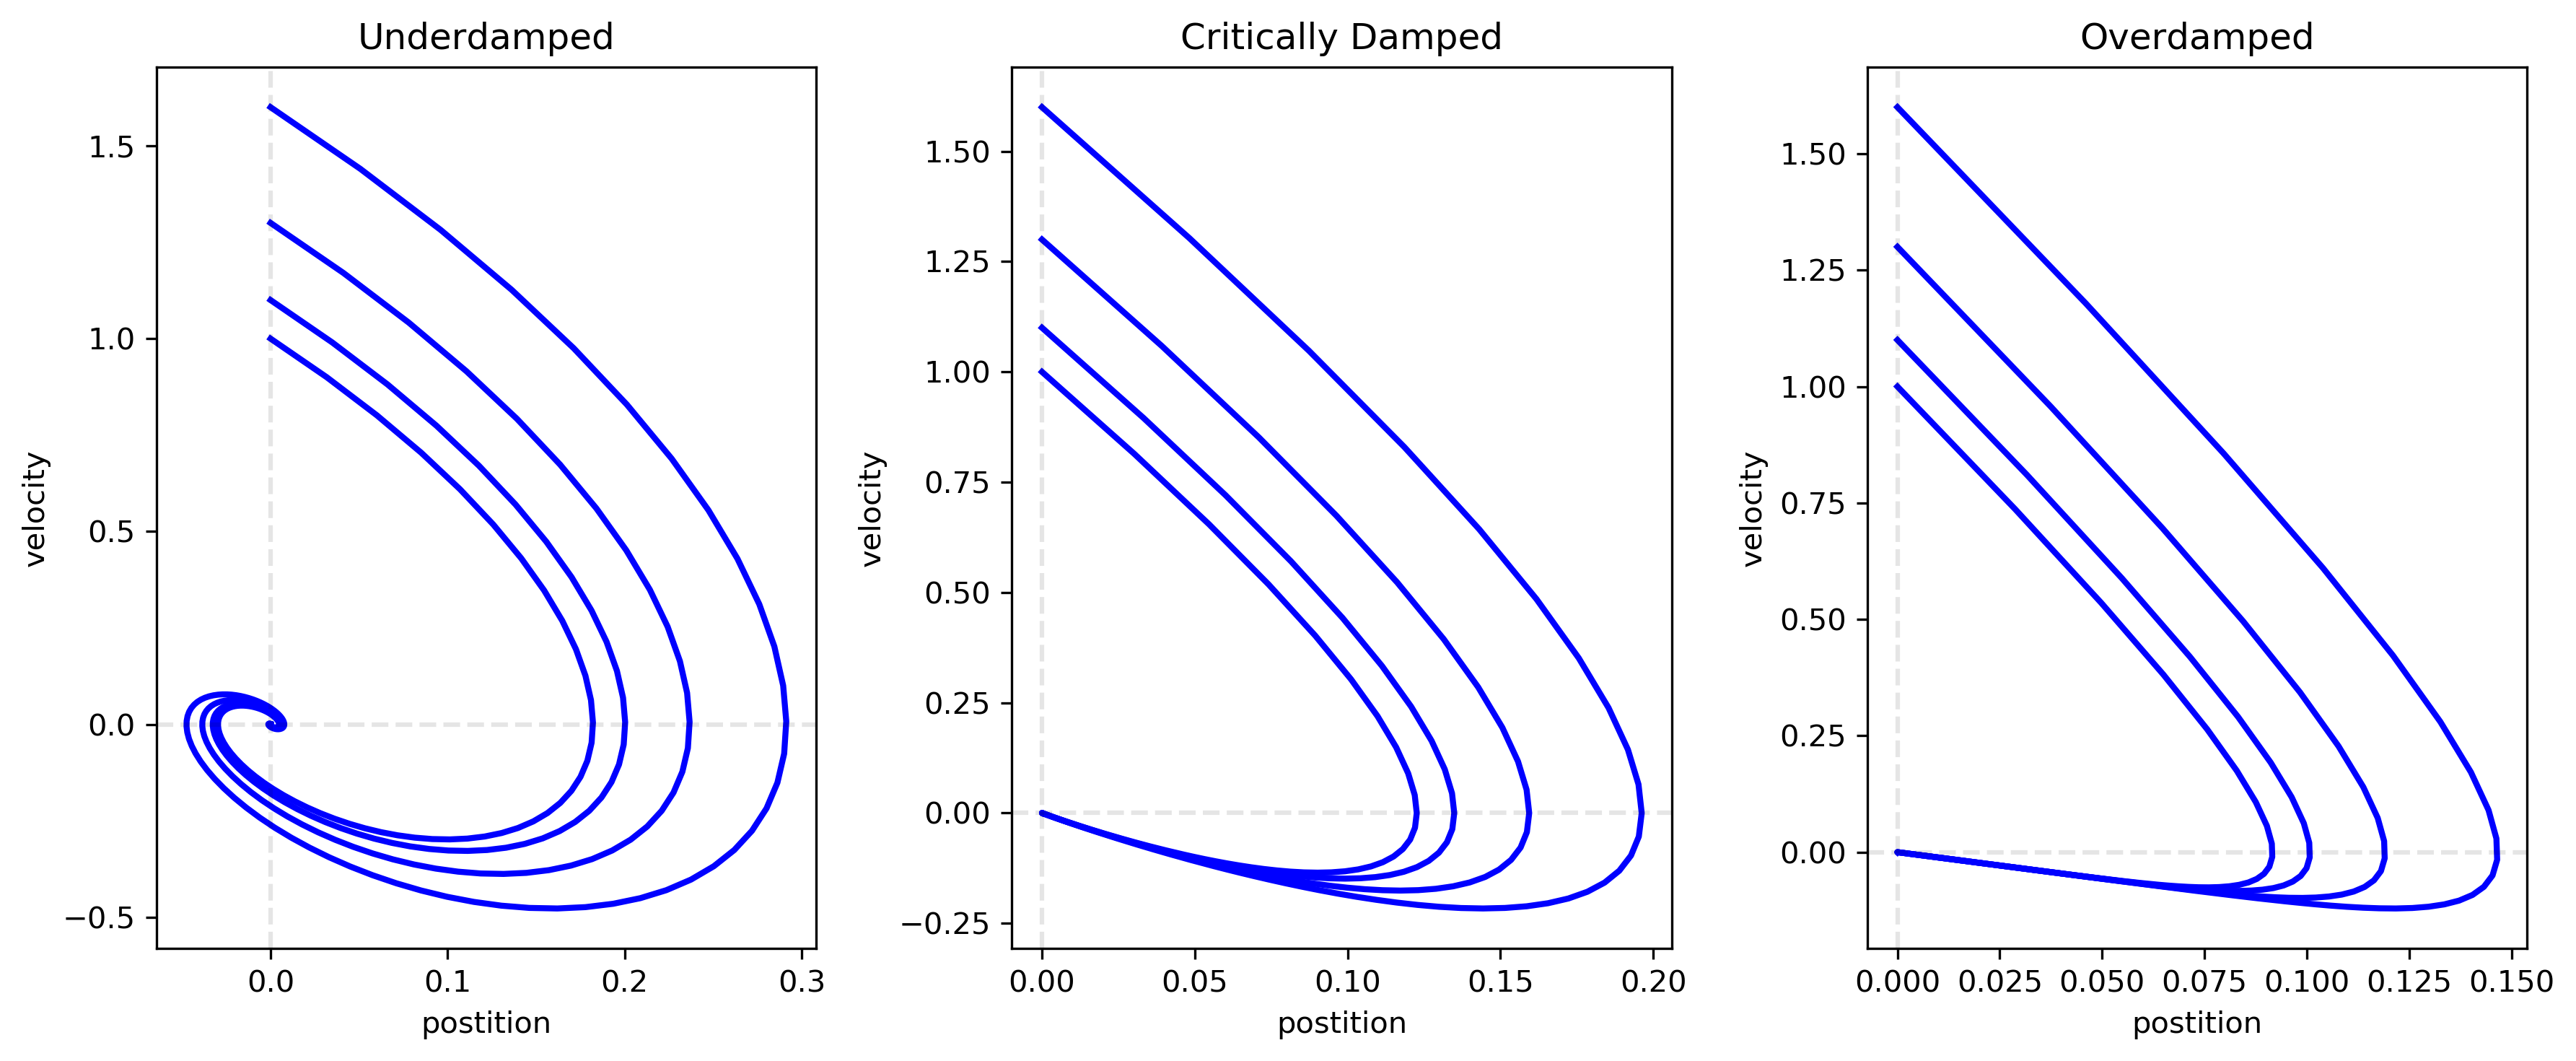

In [14]:
def Cases(param):
    plt.title(Calculate(param)) 
    #note how the plot will automatically show the damping case in the figure title
    initial = np.array([0,1])
  
    Lines(Harmonic_Differential,initial,4,linewidth=2) 
    #plot 4 lines increasing the initial values evaluated
    plt.axhline(y=0, color='k',linestyle='dashed',alpha=0.1)
    plt.axvline(x=0, color='k',linestyle='dashed',alpha=0.1)
    plt.tight_layout()
plt.figure(figsize=(12,5),dpi=300)
#plotting the three different damping cases
for i in range(3):    
    k = 9
    m = 1
    μ = 3*(i+1)

    plt.ylabel("velocity")
    plt.subplot(1,3,i+1)
    param = np.array([k,m,μ])   
    Cases(param)

If this is the first time the reader is exposed to the phase diagrams of the Damped Harmonic Oscillator, *please* take a second to *appreciate these graphs*. In fact, the reader is encouraged to exagerate the spiral by decrasing the damping factor $\mu$. The phase diagram should look similar to the one below, with similar graphs of motion: 

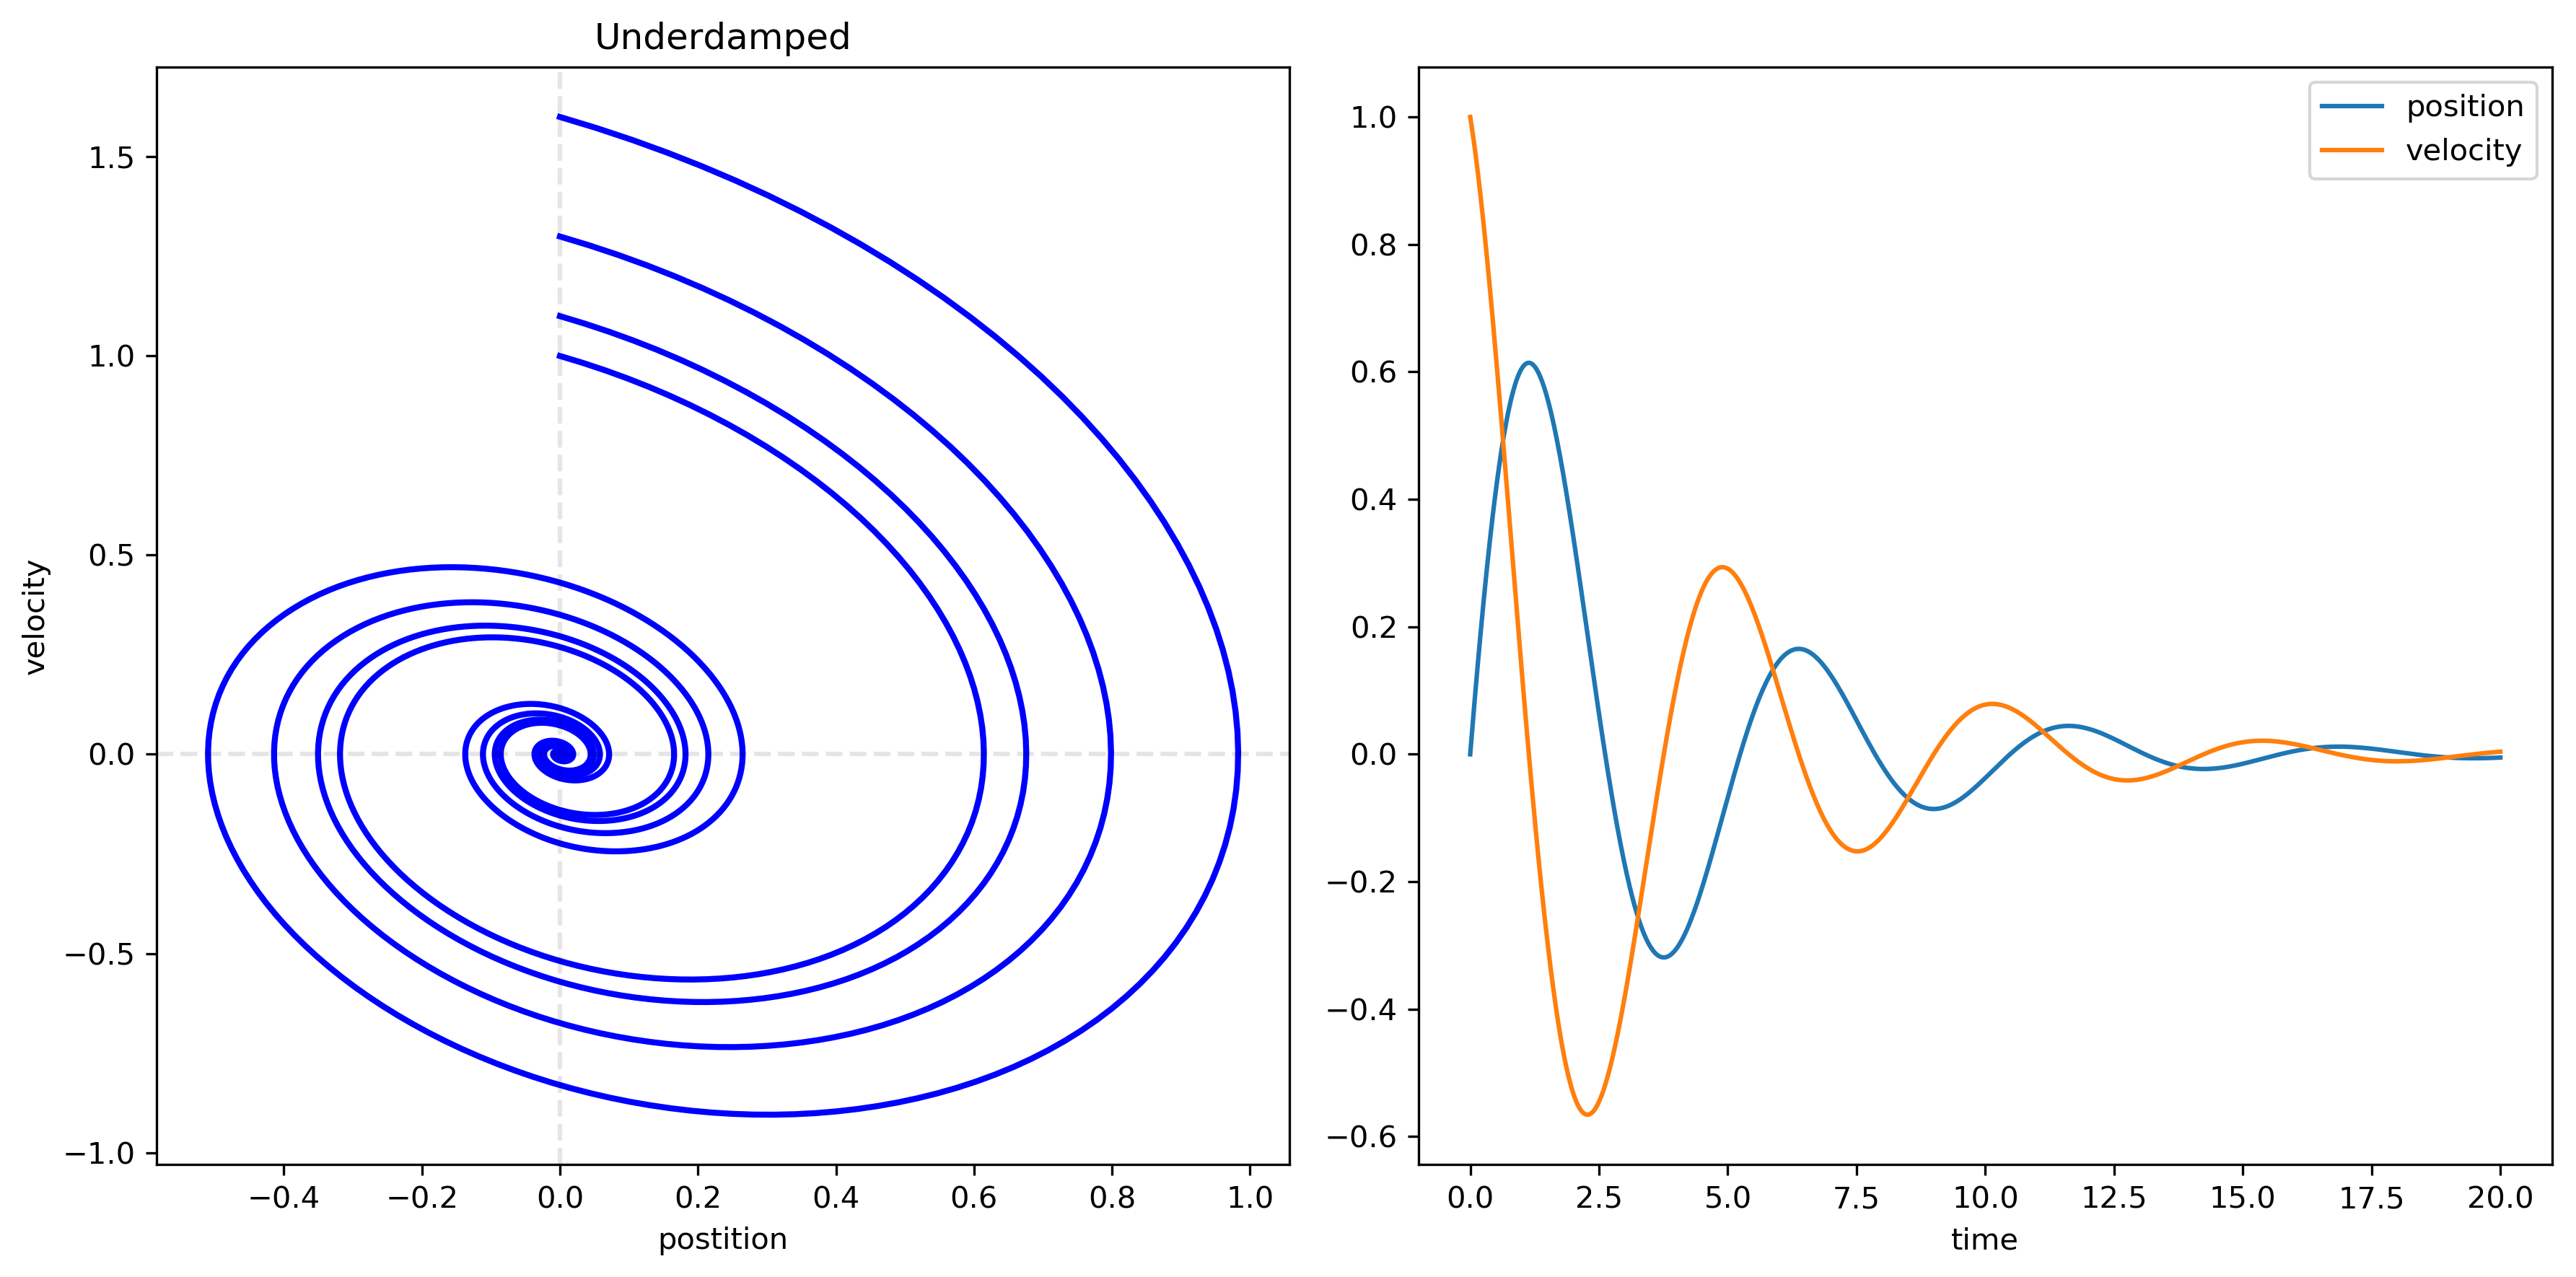

In [15]:
k = 9
m = 6
μ = 3
param = np.array([k,m,μ])
plt.figure(figsize=(12,6),dpi=300)
plt.subplot(1,2,1)
Cases(param)
initial = np.array([0,1])
plt.subplot(1,2,2)
solution = solve_ivp(Harmonic_Differential,[np.argmin(t),np.argmax(t)],initial,t_eval=t)
position , velocity = solution.y
plt.plot(solution.t,position,label="position")
plt.plot(solution.t,velocity,label="velocity")
plt.xlabel("time")
plt.tight_layout()
plt.legend()
plt.show()

## Van der Pol Oscillator

In our quest to further generalise the range of physical problems studied with our code, we shall now look at the Van der Pol oscillator. The reader may not be familiar with this type of oscillator as it is non-conservative oscillator with non-linear damping, where the time development of the system is governed by the following second order ODE. The following substitutions are used to code the differential function.

$$ 
\frac{d^2 x}{dt^2} - \mu(1-x^2)\frac{dx}{dt} + x = 0
$$

$$ 
\begin{align}
\frac{dx}{dt} &= y
\\
\frac{dy}{dt} &= \mu (1-x^2)y - x
\end{align}
$$

Important to note:
- When **μ = 0**: there is no damping and the system behaves like the simple harmonic oscillator
- When **μ > 0**: the system enters a limit cycle and far from the origin the system experiences non-linear damping

The differential function used for scipy is the Jacobian of the partial derivatives. The importance of Van der Pol oscillators is that the exhibit something called limit cycles. These are stable configurations that the system will evolve to and have important applications in electronics. Understanding the nature of these limit cycles is of paramount importance, and numerical methods allow us to explore the different limit cycles.

In [16]:
def VdP_O(t,X):
    y = X[1]
    y1 = -μ * (X[0]**2.0 - 1.0) * X[1] - X[0]
    return np.array([y,y1])

def Arrows(func,opacity=0.7,title='Direction Field',lim=6):
    ymax = lim
    xmax = lim
    grid = 20
    x = np.linspace(-xmax , xmax, grid)
    y = np.linspace(-ymax , ymax, grid)
    X1, Y1 = np.meshgrid(x,y)
    DX1 , DY1 = func(t,[X1 , Y1])
    M = plt.hypot(DX1,DY1)
    M [M==0] = 1
    DX1 /= M
    DY1 /= M
    colormap = plt.cm.binary_r
    plt.title(str(title))
    plt.xlabel("Position")
    plt.ylabel("Velocity")
    plt.quiver(X1, Y1, DX1 ,DY1,pivot = 'mid',color='black',alpha=opacity)

The following graph shows the Direction Field and some trajectories for the Van der Pol oscillator, where $\mu=0.4$.

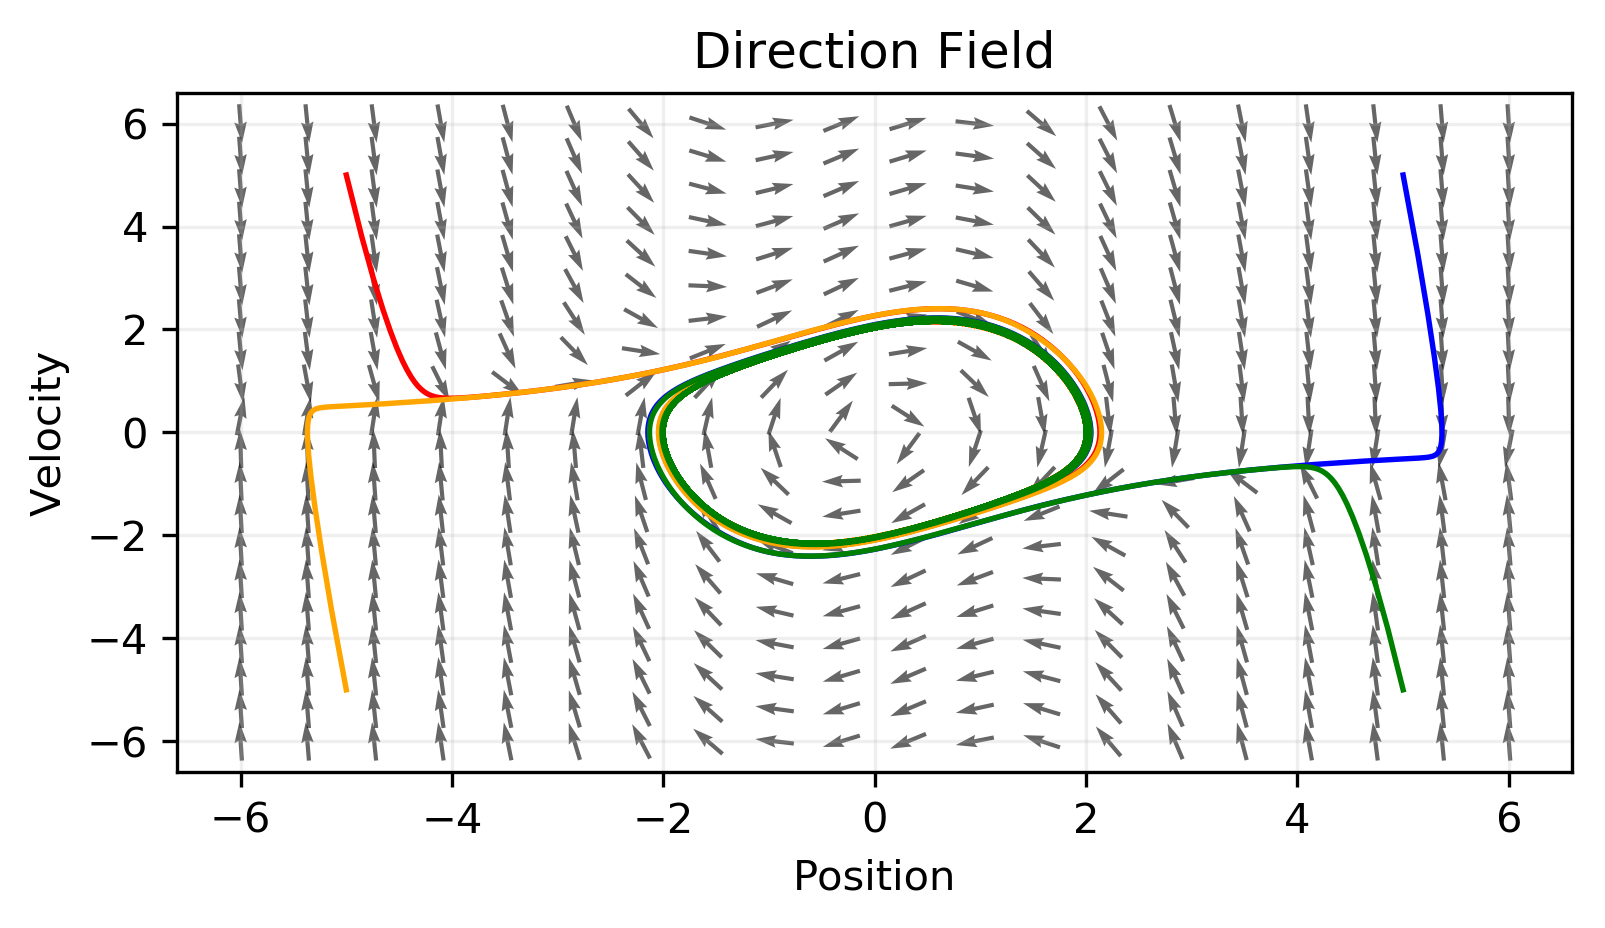

In [17]:
μ=0.4
plt.figure(figsize=(6,3),dpi=300)
colors=np.array(['blue','red','orange','green'])
initial=np.array([[5,5],[-5,5],[-5,-5],[5,-5]])
#initial = np.array([6,6])
for i in range(len(colors)):
    Lines(VdP_O,initial[i],1,color=str(colors[i]),linewidth=1.3)
    
Arrows(VdP_O,0.6)
plt.grid(alpha=0.2)

We can see how regardless of the very different initial conditions, the system reaches the limit cycle in the middle. One can start to question what the limit cycle looks like for different values of $\mu$ which is precisely what the next graph shows.

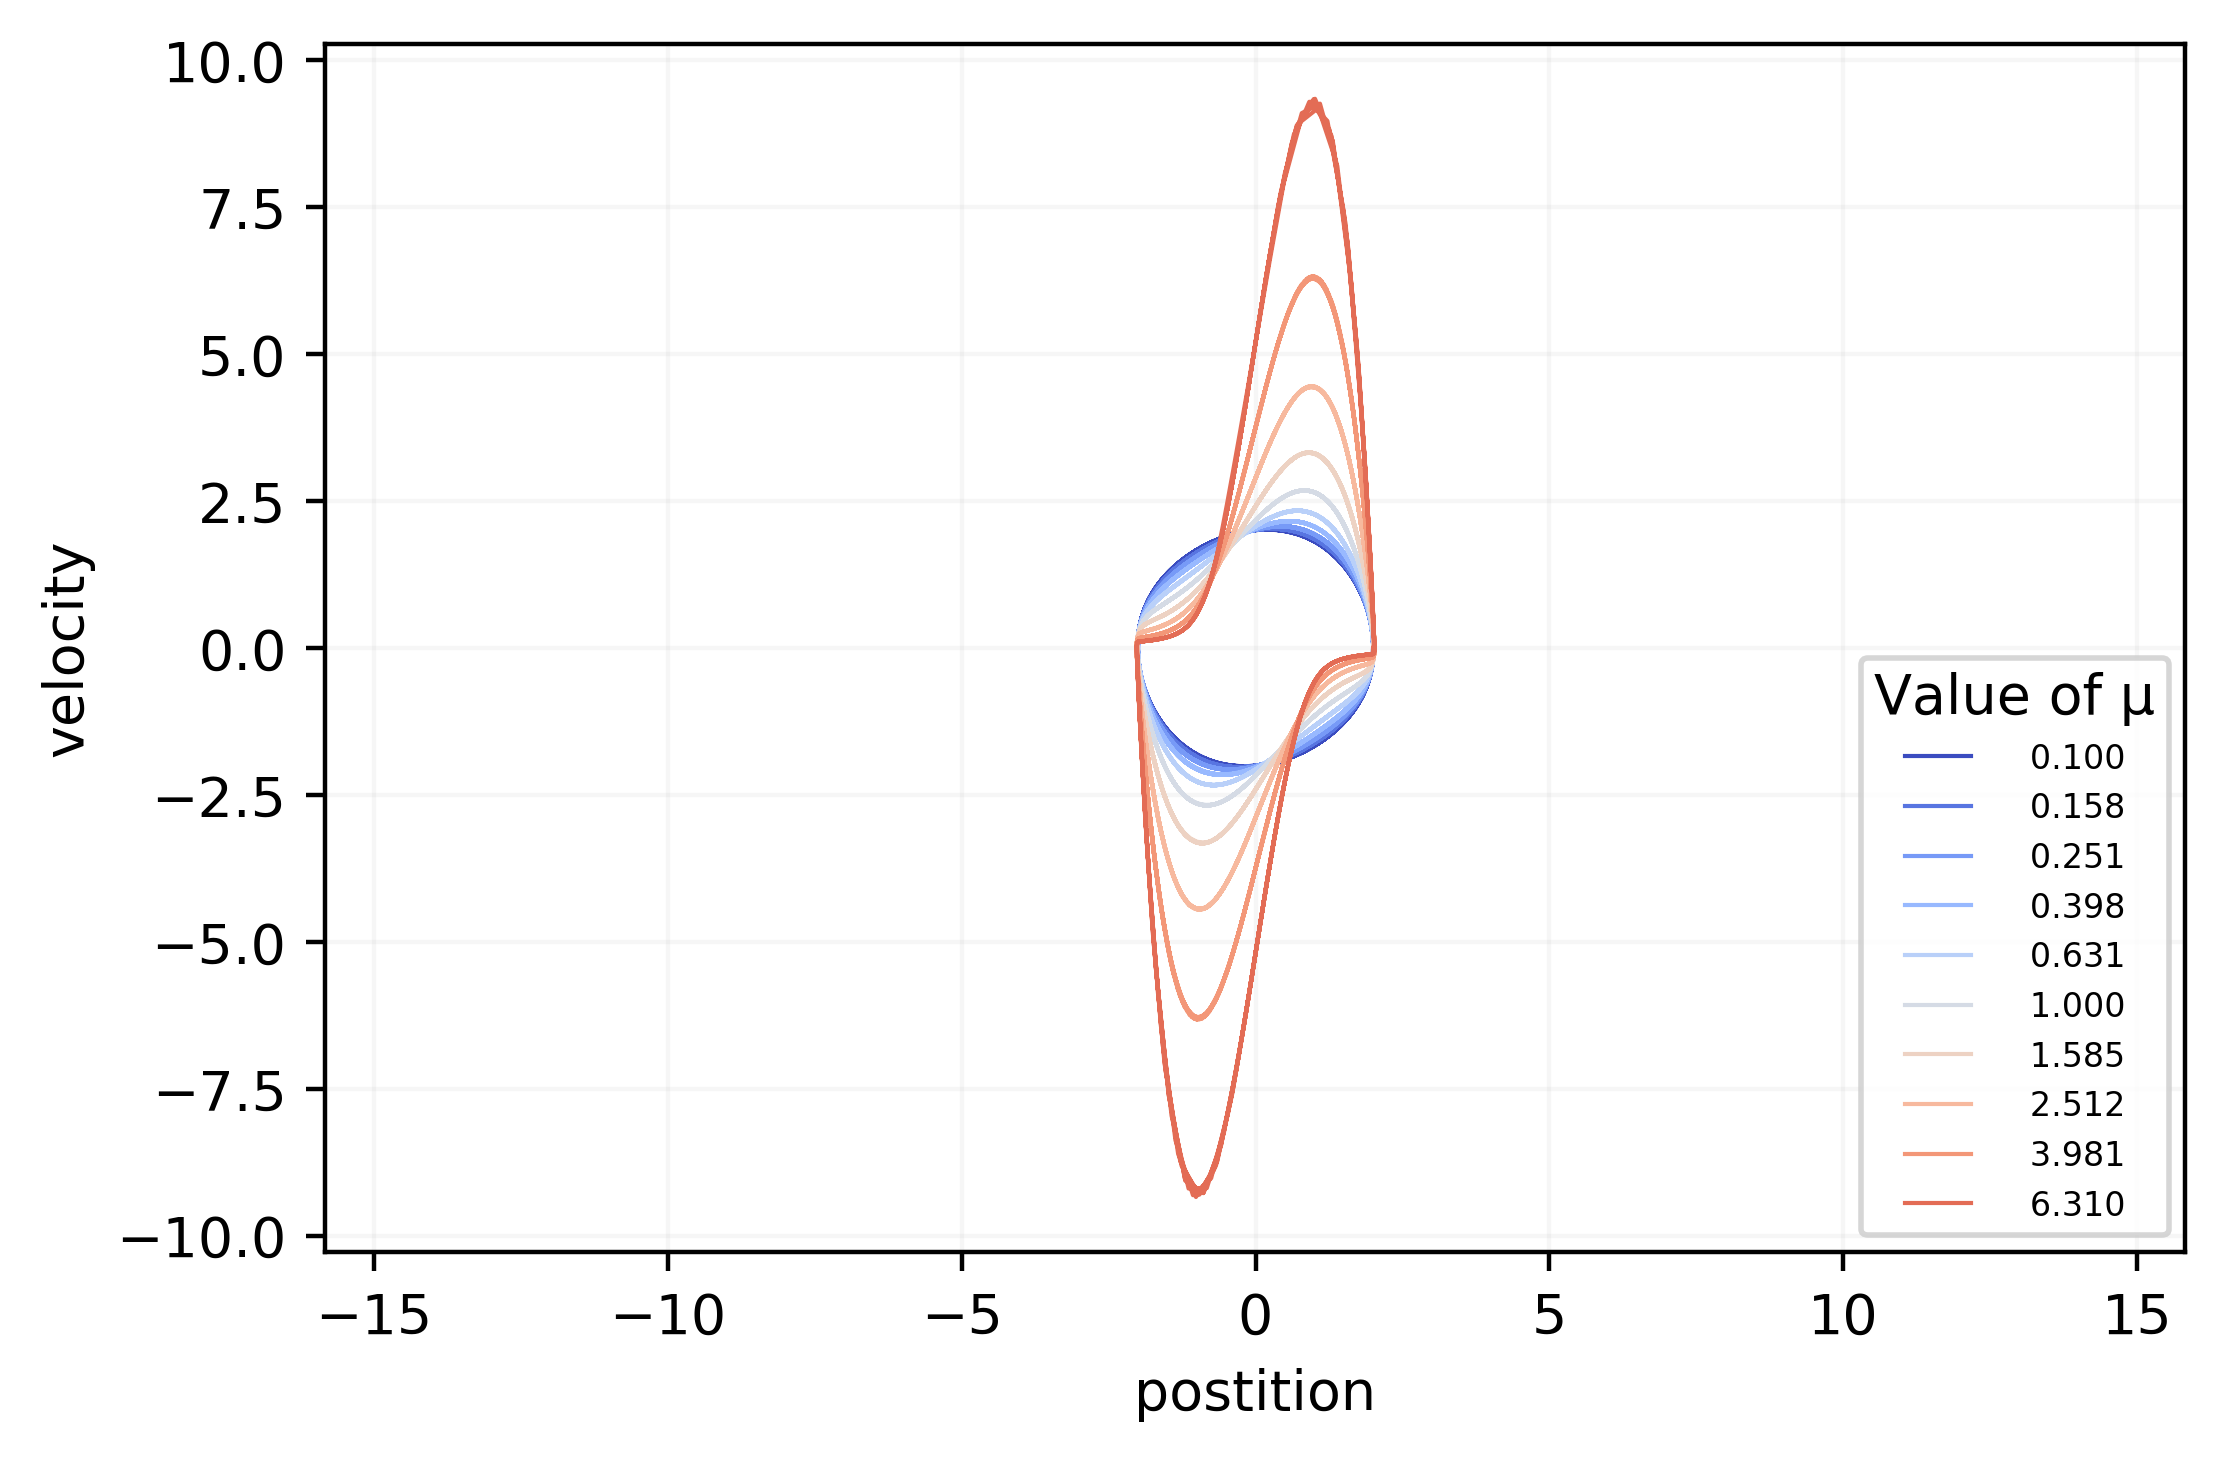

In [18]:
values = np.logspace(-1,0.8,10)
plt.figure(dpi=400)
plt.xlim((-5,5))
plt.ylim((-12,12))
length = len(values)
col = plt.cm.coolwarm(np.linspace(0,0.85,10))
for j in range(length):
    μ=values[j]
    Lines(VdP_O,np.array([2,0]),1,color=col[j],legend=μ,linewidth=0.75)
plt.legend(title="Value of μ",loc=4,prop={'size': 6})
plt.axis('equal')
plt.grid(alpha=0.1)
plt.show()

Apart from being a beautiful graph, it shows a few interesting properties. The first one is that when $\mu \approx 0$ the system shows the expected circle characteristic of the simple harmonic oscillator. However, the starting conditions where carefully chosen at $x=2$ and $v=0$ so the graph does not give us an indication of how much time is needed in order to reach the limit cycle, nor does the graph evaluate its stability. To evaluate these two qualities, we will plot the direction field and different initial conditions for a range of $\mu$ values, shown in the following graphs.

**Note**: The following figure takes a bit to load, and graphs should come in sets of two, until 8 graphs have been plotted, the first line prints the values of $\mu$ plotted, which can be compared with the graph titles to see the progress.

Values of μ: [0.19952623 0.31622777 0.50118723 0.79432823 1.25892541 1.99526231
 3.16227766 5.01187234]


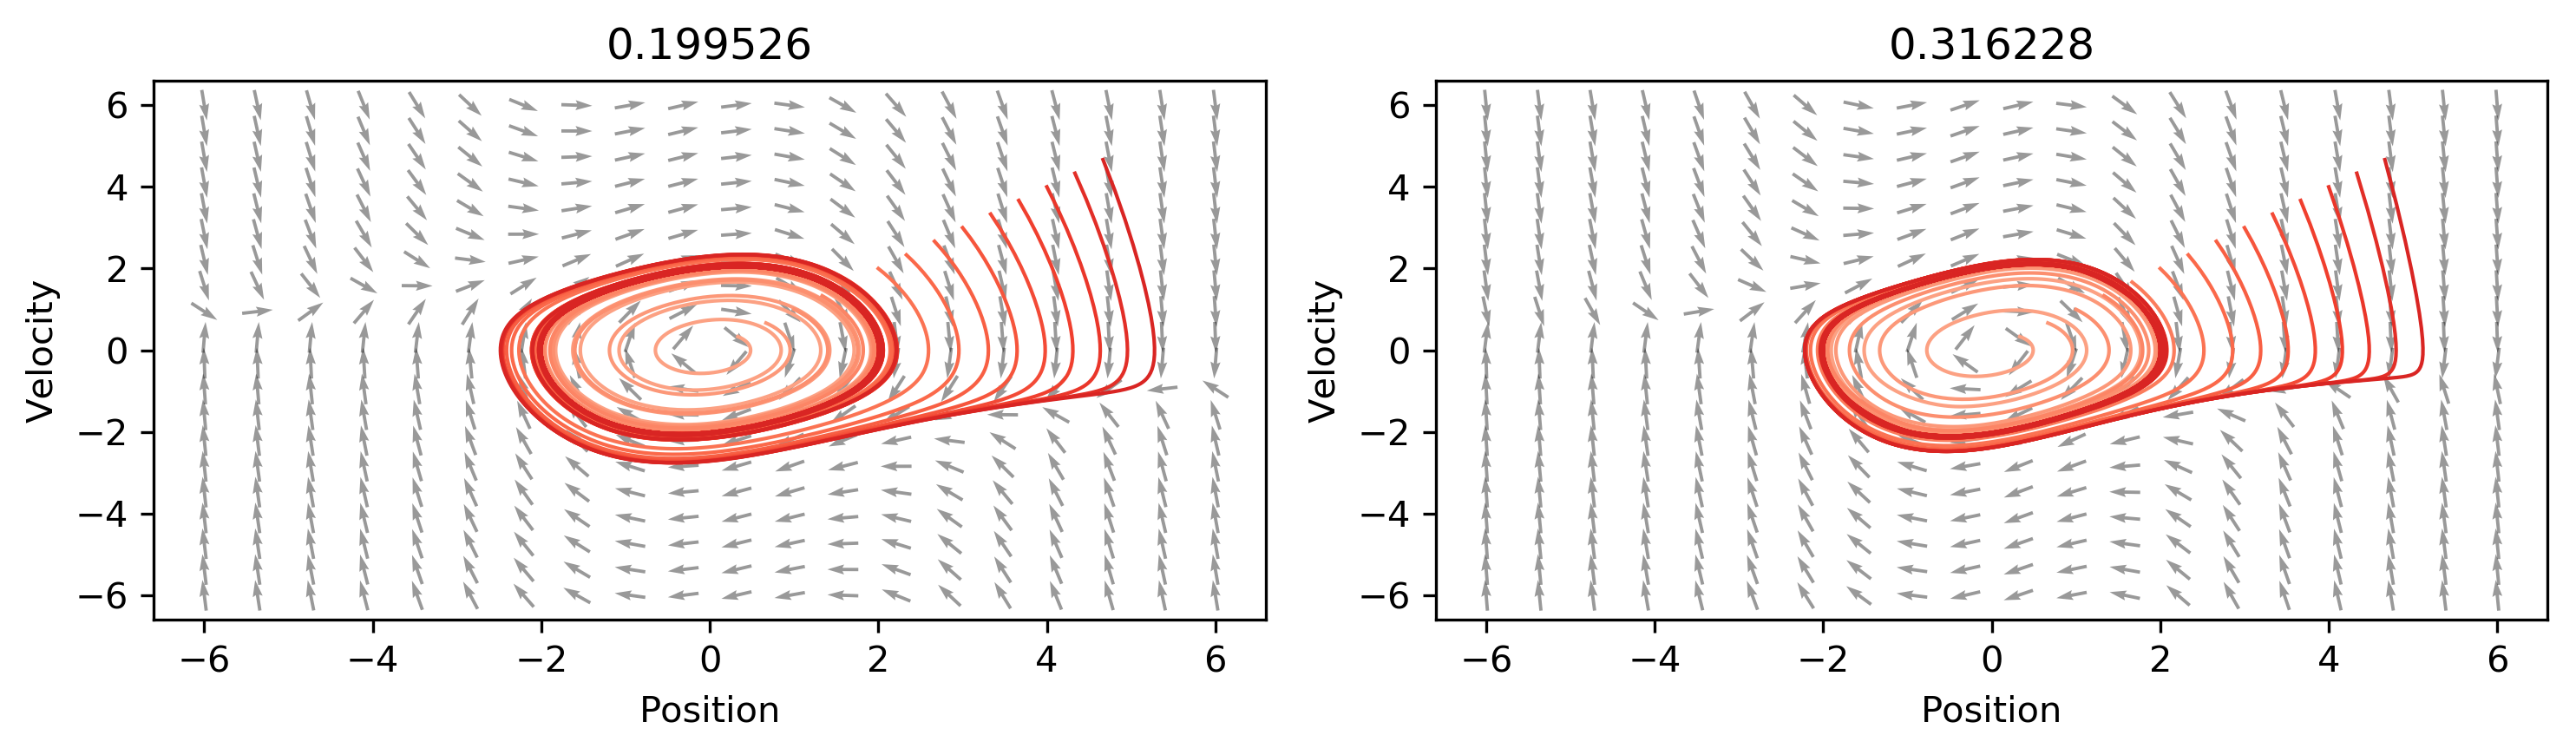

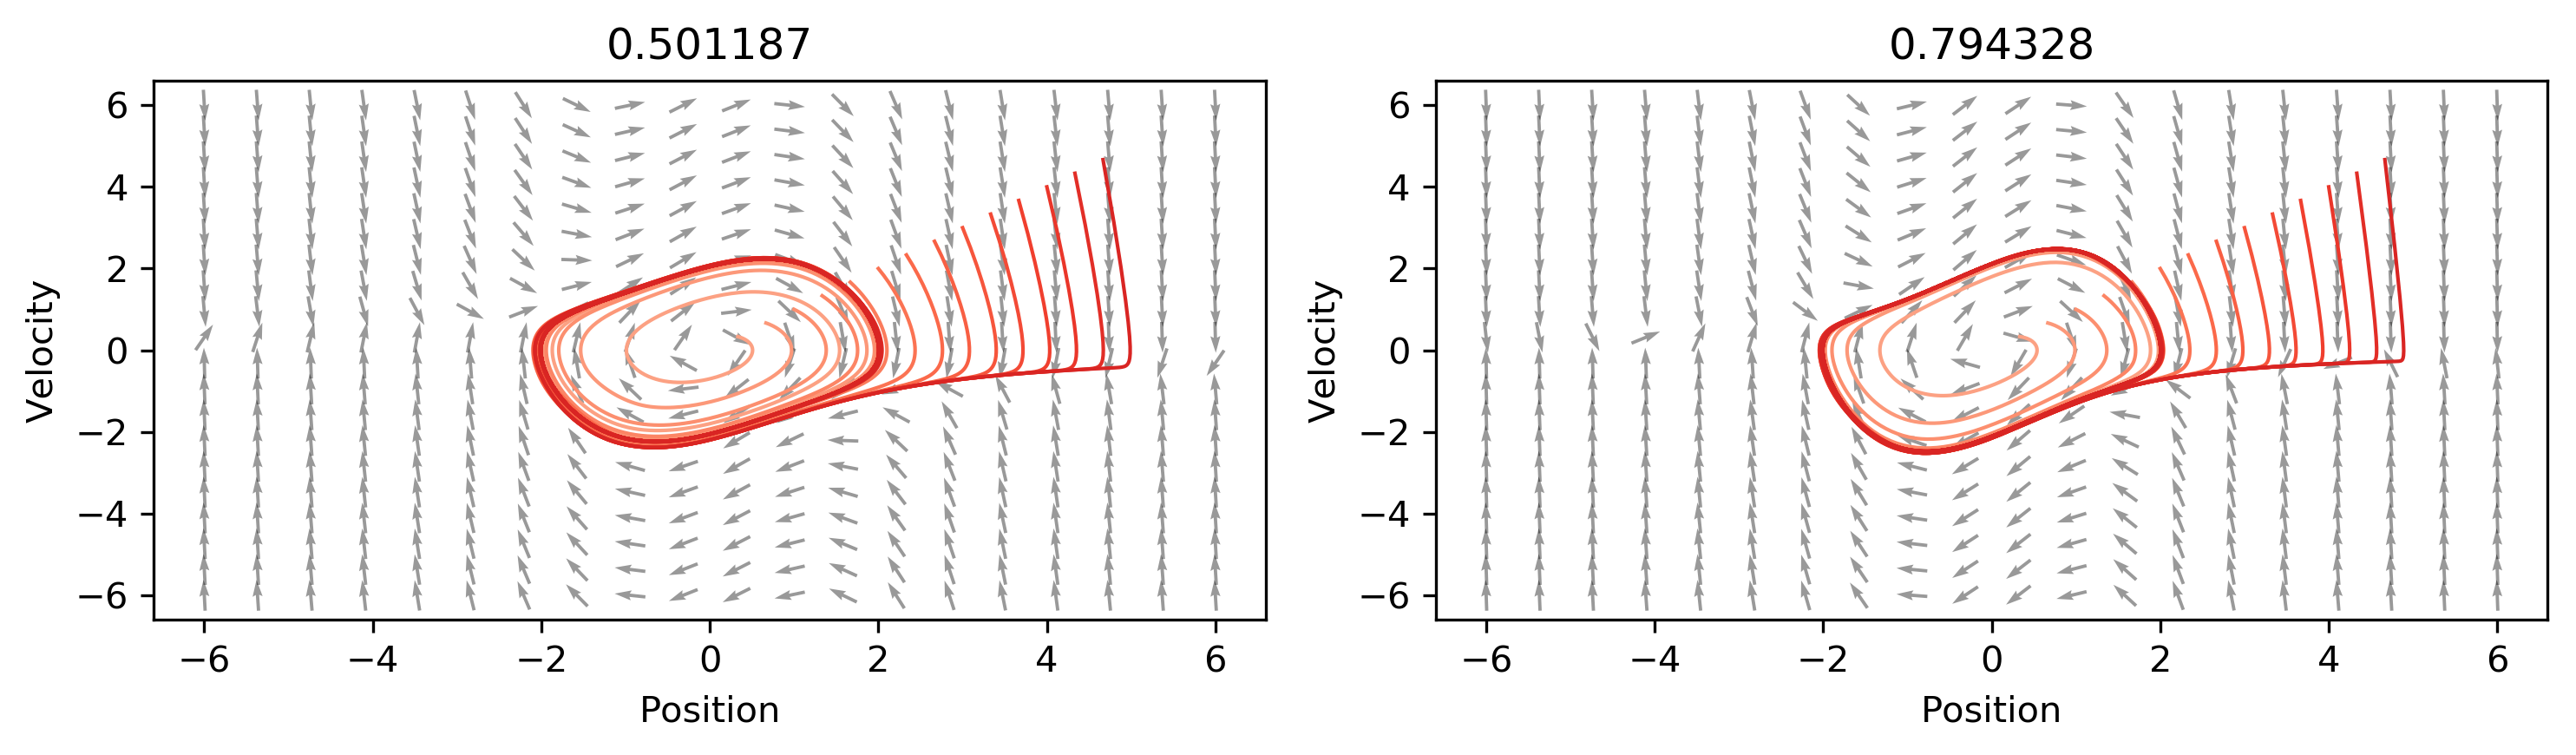

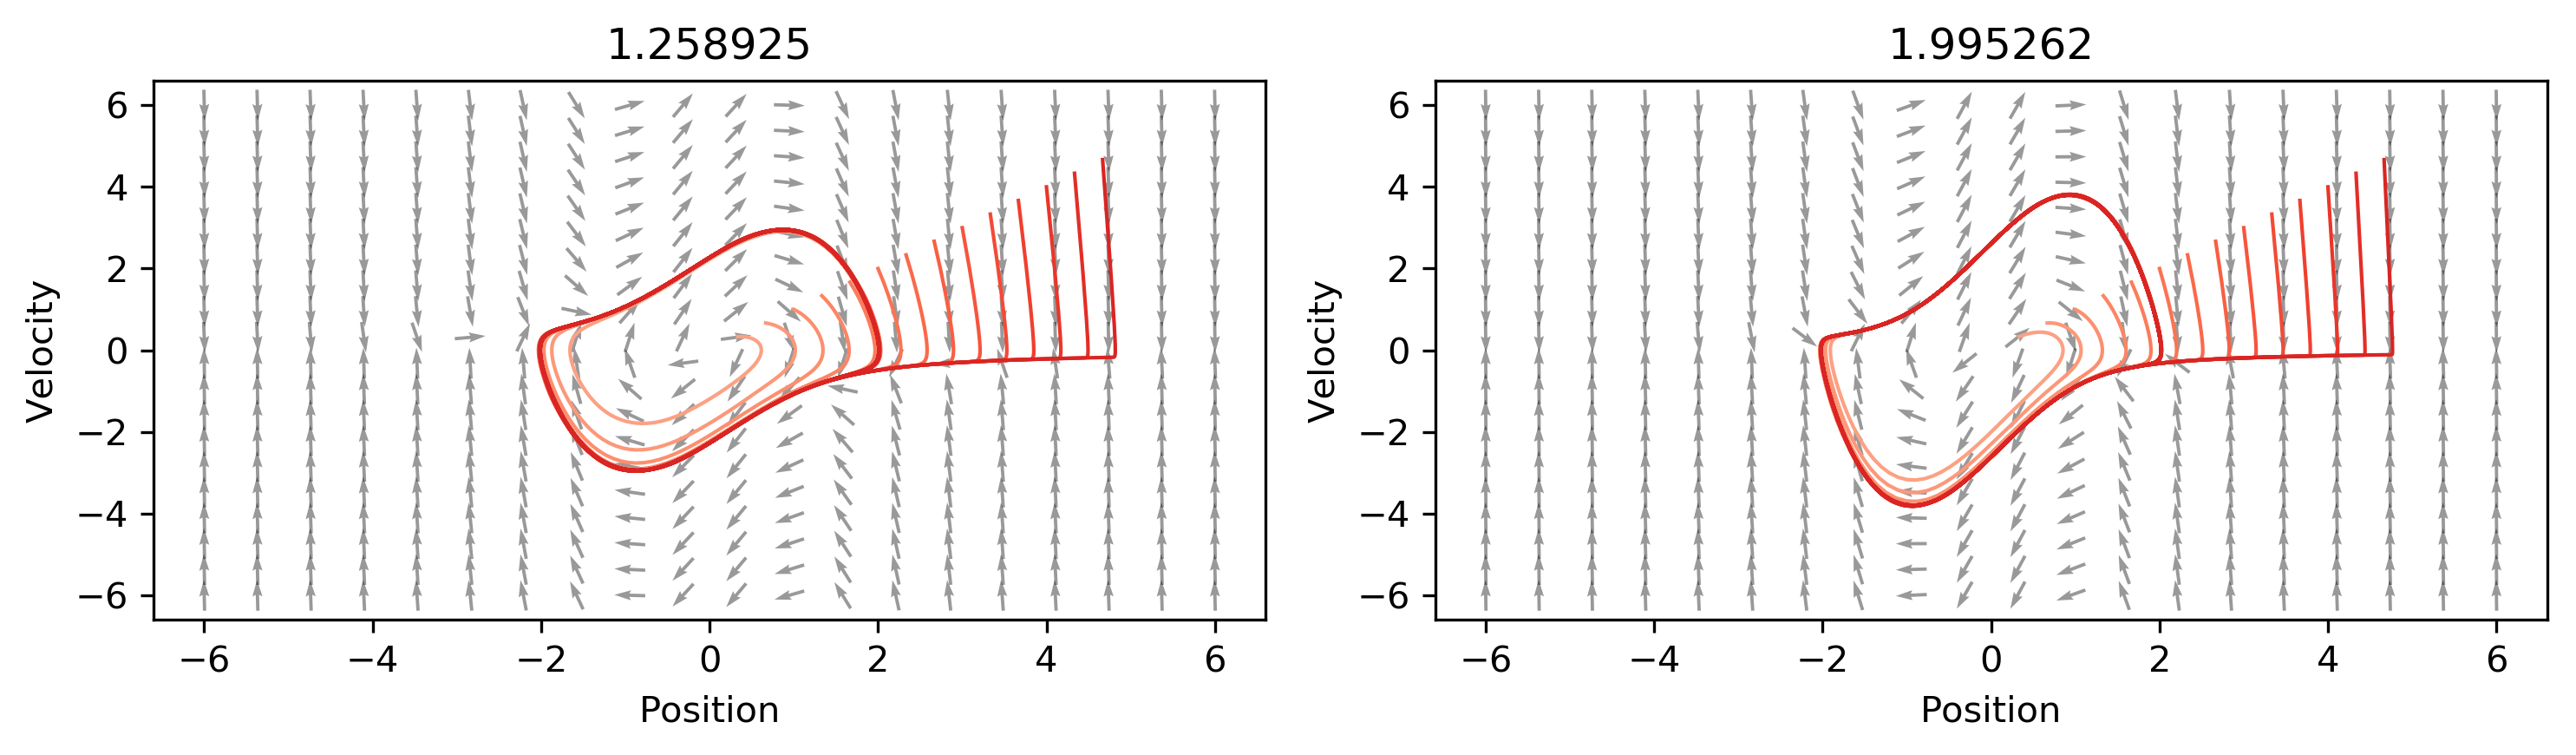

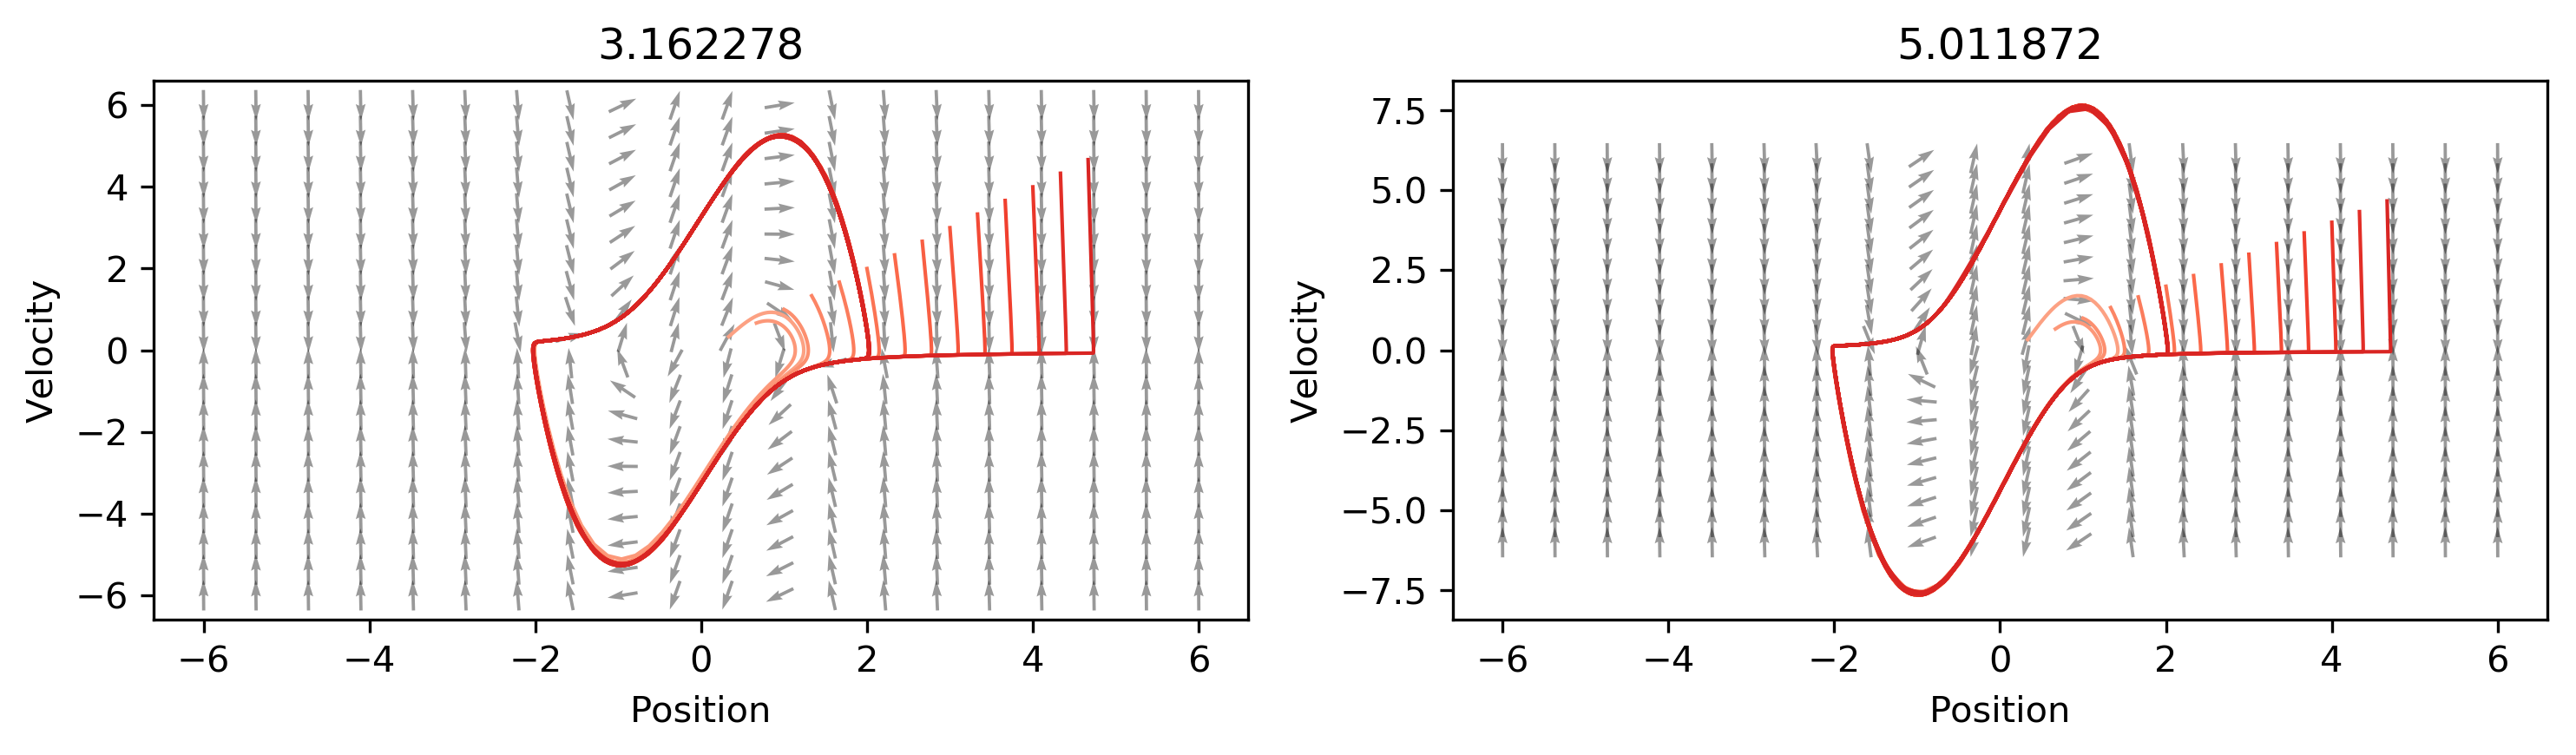

In [19]:
values = np.logspace(-0.7,0.7,8)
print("Values of μ:", values)
initial = []
for i in range(15):
    initial.append([i,i])
initial = np.array(initial)/3
vcolors = plt.cm.Reds(np.linspace(0.3,0.7,15))
plt.figure(figsize=(10,3),dpi=300)
for i in range(len(values)):
    μ=values[i]
    plt.subplot(1,2,(i%2)+1)
    for j in range(len(initial)):
        Lines(VdP_O,initial[j],1,color=vcolors[j])
    plt.title("{:8.6f}".format(values[i]))
    plt.tight_layout()
    Arrows(VdP_O,0.4,title="{:8.6f}".format(values[i]))
    if (i+1)%2==0:    
        plt.show()
        plt.figure(figsize=(10,3),dpi=300)

It should come as no surprise that limit cycle in the graphs above follow the trend seen in the previous figure. Also, the plots above are a type of attractor called a limit cycle. The value for $\mu$ is an indicator of how prone and how fast given initial conditions are to enter the corresponding limit cycle, as well as its stability. For example, in the case where $\mu = 0.31$ we can see that the limit cycle begins to be noticeable, and the system takes some time until it settles in the cycle, whereas in the case where $\mu > 2$ the system almost immediately settles in the limit cycle regardless of the initial conditions and is the limit cycle is very clearly defined. Numerical solutions to a given value for $\mu$ have profound applications as they allow us to fine tune a given system, almost like tuning a tuned mass damper just the right way to prevent skyscrapers from breaking. As an example, the current of an electrical system can made in such a way as to follow the behaviour of a Van der Pol oscillator, so that after a given time the signal resembles the pulse wave, as shown below.

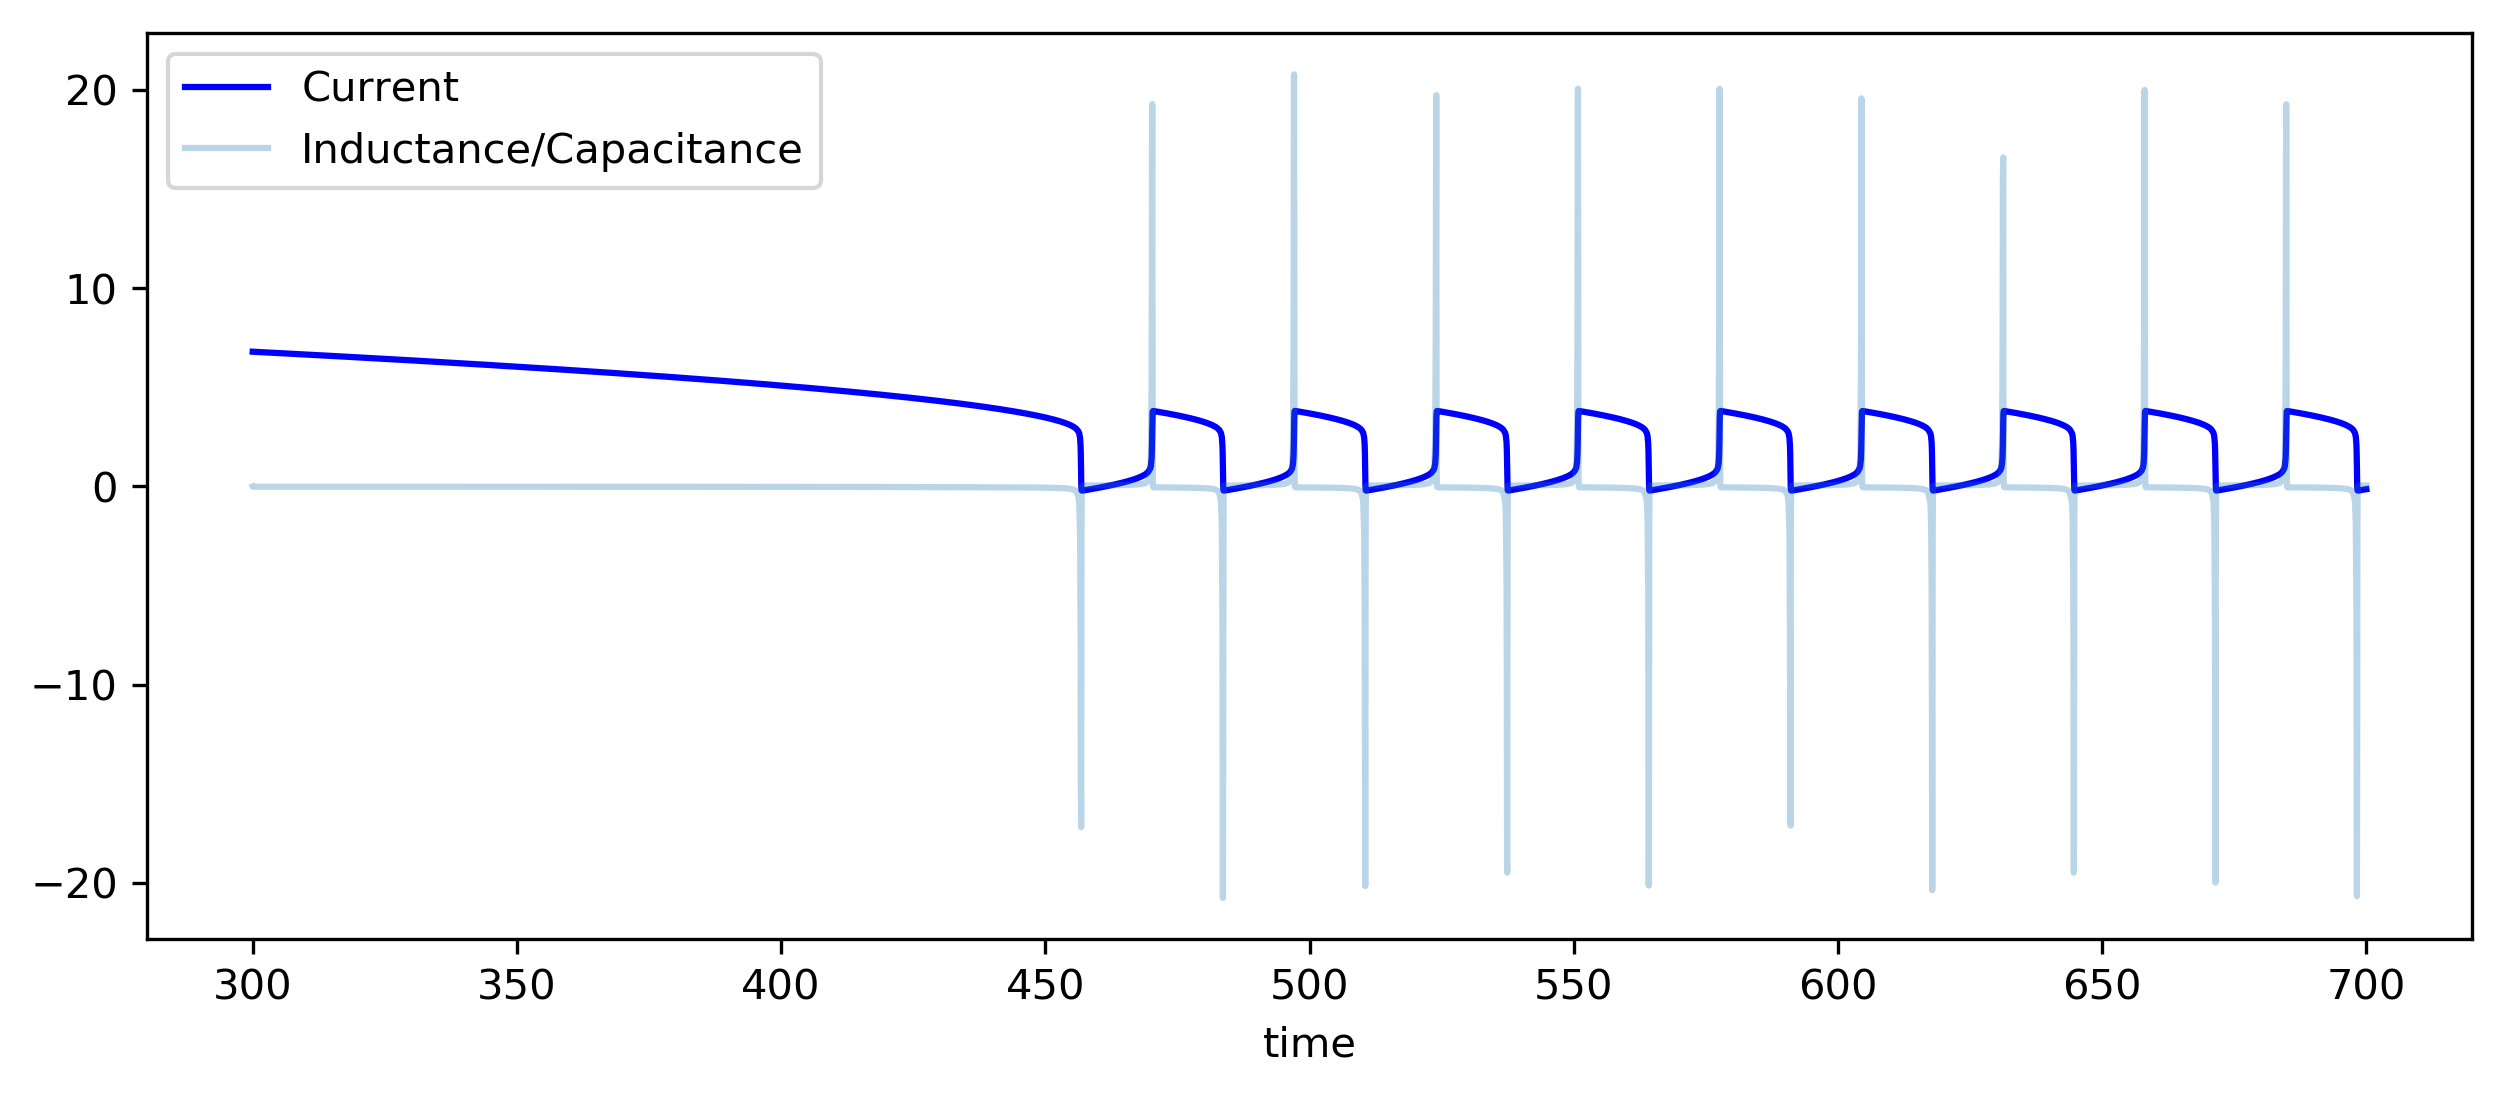

In [20]:
μ=15
plt.figure(figsize=(10,4),dpi=300)
solution = solve_ivp(VdP_O,[300,700],np.array([5,0],))#,t_eval=np.linspace(0,200,1000))
position , velocity = solution.y
plt.plot(solution.t,position+1.8,label="Current",color="blue")
plt.plot(solution.t,velocity,label="Inductance/Capacitance",alpha=0.3)
plt.xlabel("time")
plt.legend()
plt.show()

Another example of an attractor is what is called the Lorentz attractor. The following was done mainly as a very brief introduction to 3D graphing, which the reader is highly encouraged to explore, specially with *MayaVi*.

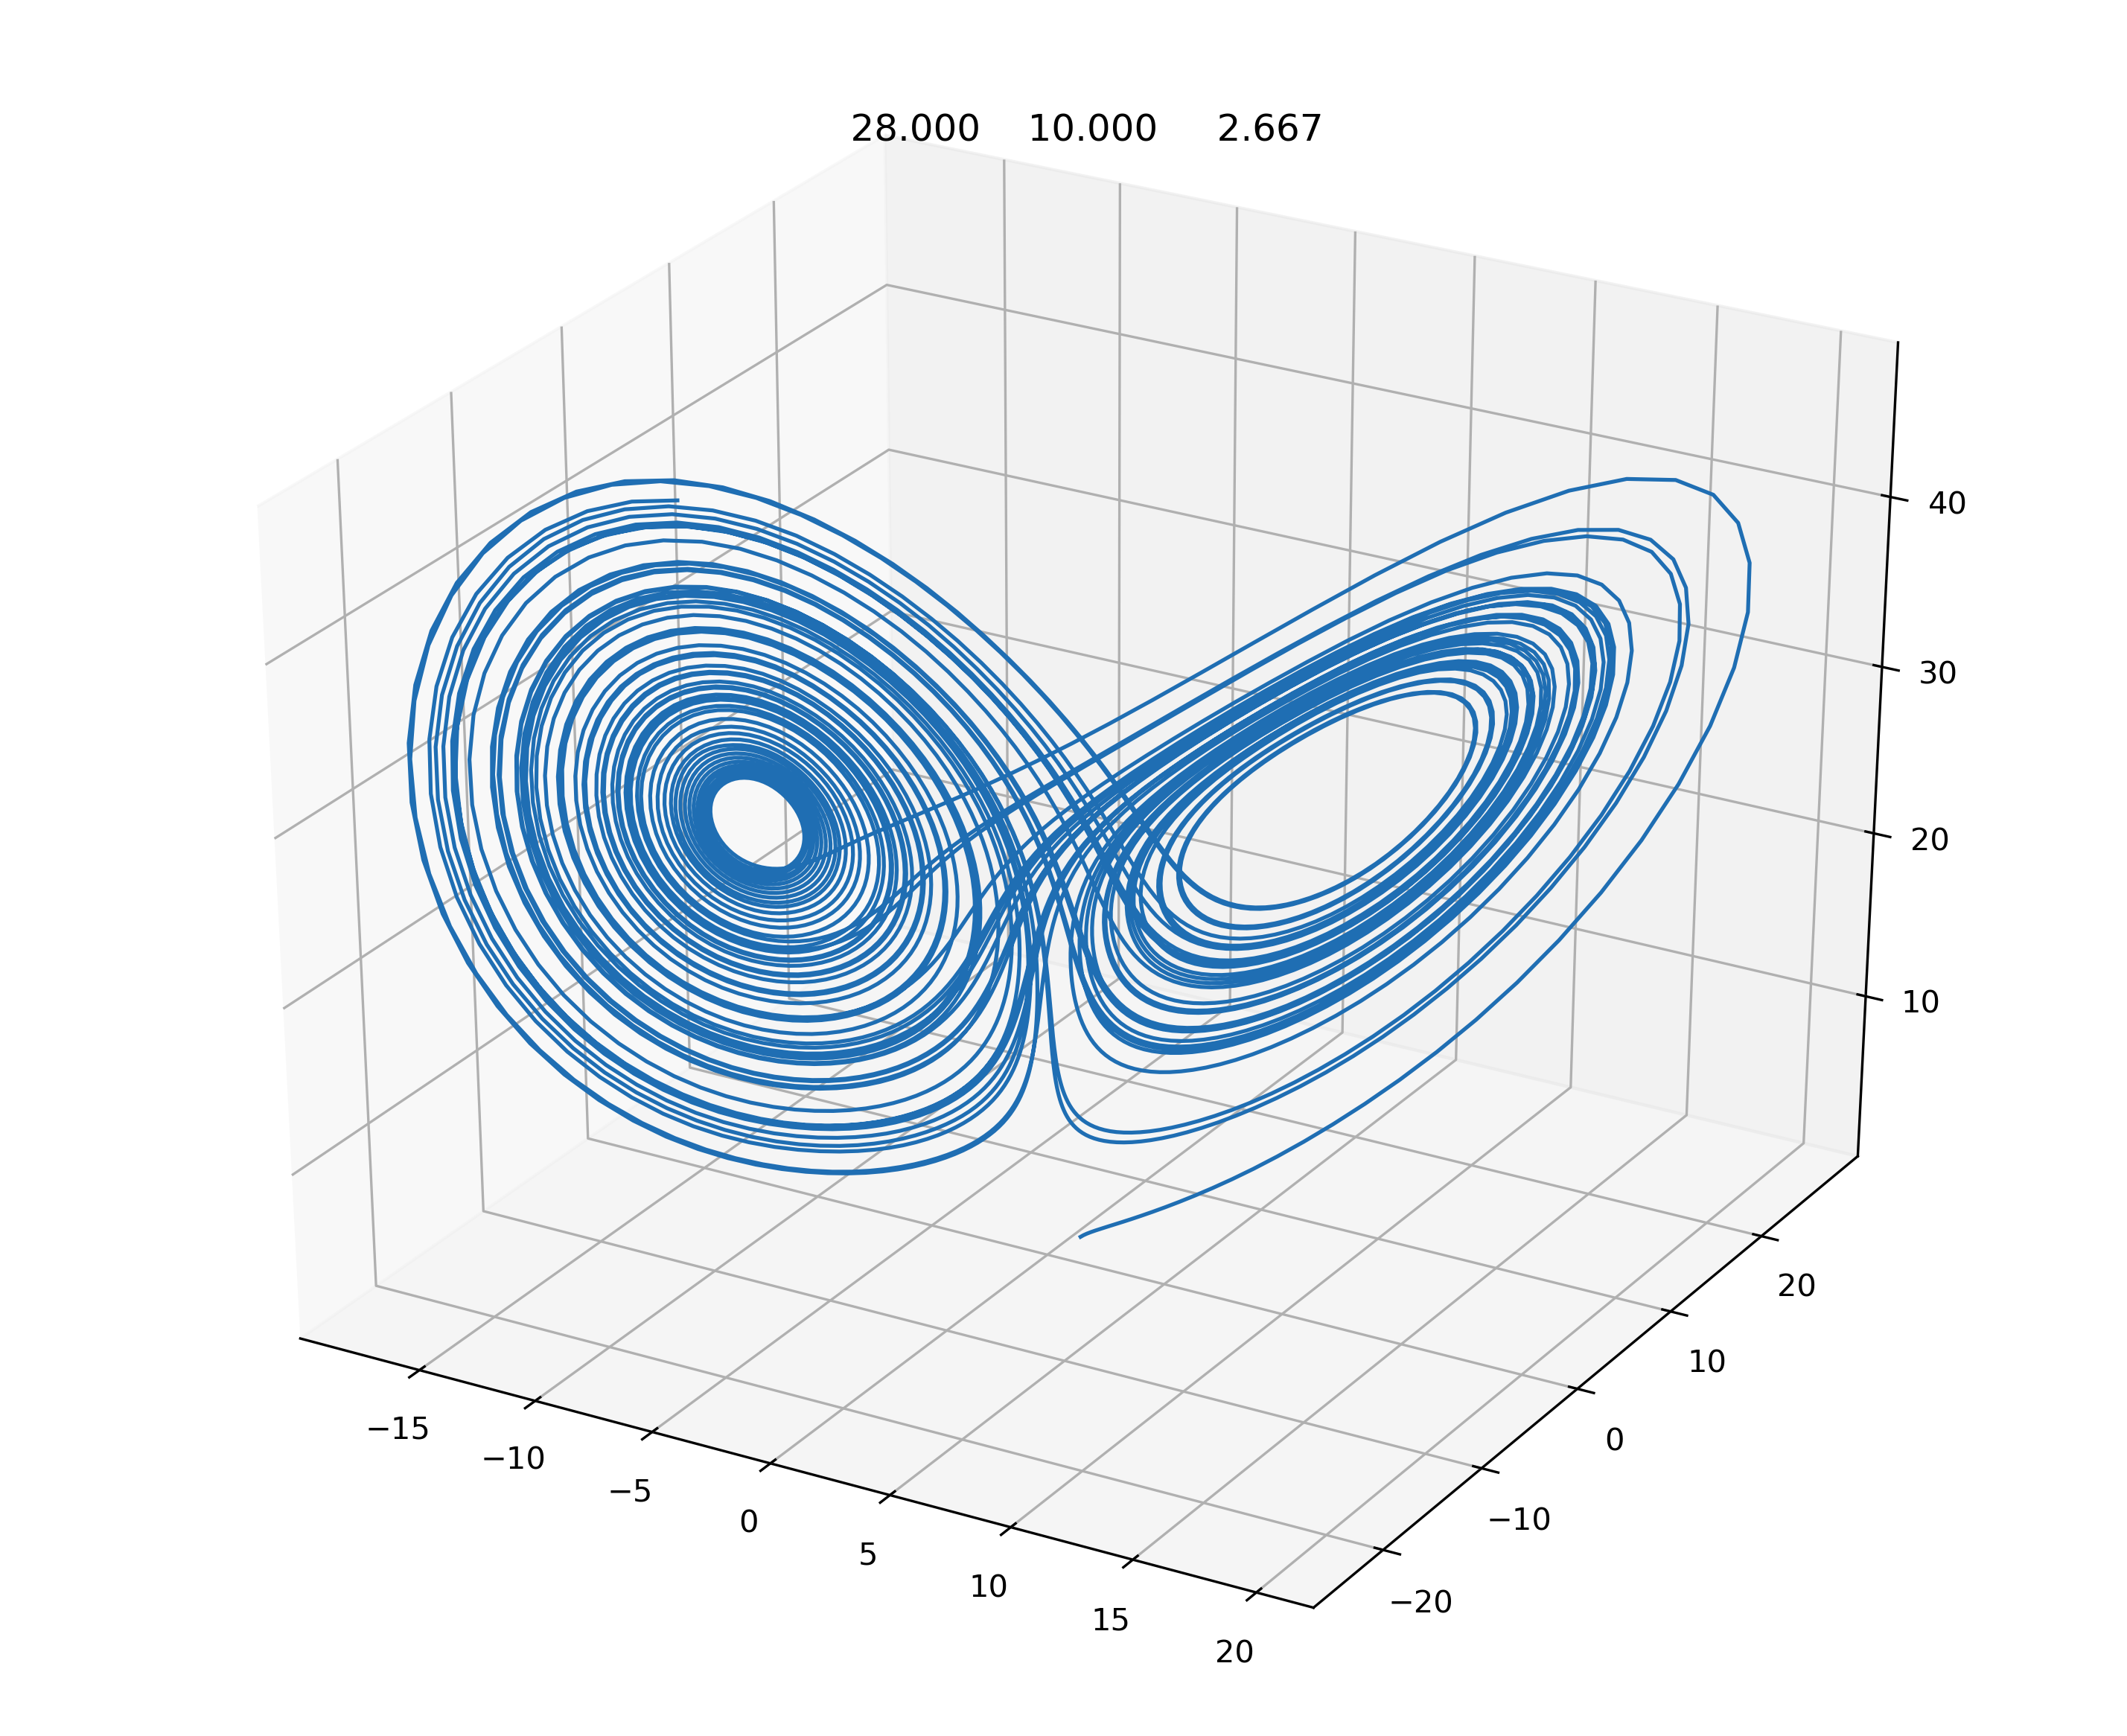

In [21]:
from mpl_toolkits.mplot3d import Axes3D

ρ = 28
σ = 10
β = 8.0 / 3.0

def Lorentz(t, vector):
    x, y, z = vector 
    return σ * (y - x), x * (ρ - z) - y, x * y - β * z 

initial_conditions = np.array([1.0, 1.0, 1.0])
t = np.arange(0.0, 60.0, 0.01)

sol = solve_ivp(Lorentz,[np.argmin(t),np.argmax(t)],initial_conditions,t_eval=t)
fig = plt.figure(figsize=(12,10),dpi=300)
ax = fig.gca(projection='3d')
col = plt.cm.Blues(np.linspace(0,1,30))
ax.plot(sol.y[0,:], sol.y[1,:], sol.y[2,:],color=col[22],linewidth=1.25)
#plt.title("{}{}{}"str([ρ,σ,β]))
plt.title("{:10.3f}{:10.3f}{:10.3f}".format(*np.array([ρ,σ,β])))
plt.show()

### Further Reading and Exploration

Throughout this report, there were a few extension points that were not touched on but are instead left as an exercise for the reader. The skills needed to do all of the following expansion points should have already been covered by the examples considered in the project.

- **Lotka-Volterra Equations modified**

The simplest version of the Lotka-Volterra equations has several assumptions that does not reflect accurately more complicated, or realistic behaviour found in nature. The reader is encouraged to look into the implications of species competition, multiple species (3D plots), limited resources and intraspecies competition. Complex corrections to the Lotka Volterra equations in addition to limit cycles studied with the Van der Pol oscillator are used to study enzyme reaction systems and has vast implications in the field of biochemistry in drug administration. [2]

- **Driven Oscillators: Green's Functions**

The Van der Pol oscillator example of the current showed us how after some time, the system starts behaving like a pulse wave. Green's functions can be used to study the effects of a driving pulse, whether it is a current or a force. The reader is **strongly** encouraged to explore the effects of driving forces, not only in electrical circuits but also in the case of the damped harmonic oscillator. Had there been more time for the project, this would have been an excellent topic to further generalise the examples studied.

- **MayaVi: 3D Plotting**

Although *matplotlib* is a robust graphing library and can deal with most challenges it faces, it is not the most suitable for 3D graphing or complicated vector fields. For this reason, the report would have benefited from a more sophisticated graphing library such as MayaVi. Although there is a steep learning curve, the figures and graphs that can be obtained with MayaVi are far superior to those with matplotlib or quiver.

All of these points for further reading can be explored in the resources used for this project.

## Bibliography

[1] Scipy Cookbook - Lotka-Volterra Tutorial

[2] Durham University - Lotka-Volterra (Predator prey) notes (pdf)

[3] Warren Anderson, Phillip Blake - Math Modeling for Undergraduates

[4] D. W. Jordan, P. Smith - Nonlinear Ordinary Differential Equations An introduction for Scientists and Engineers (4th ed)

[5] University of Connecticut - Van der Pol oscillator (pdf)